<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

WHO = 7
SONG = 1
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

16:44:34 INFO << load arm CSV.
16:44:34 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, 7, 1, pf_order)) 
            
    return pfs

In [5]:
pfs = gogo(WHO, SONG, TRAIN_ORDER)

100%|██████████| 3/3 [00:46<00:00, 15.61s/it]


16:45:44 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
16:45:44 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


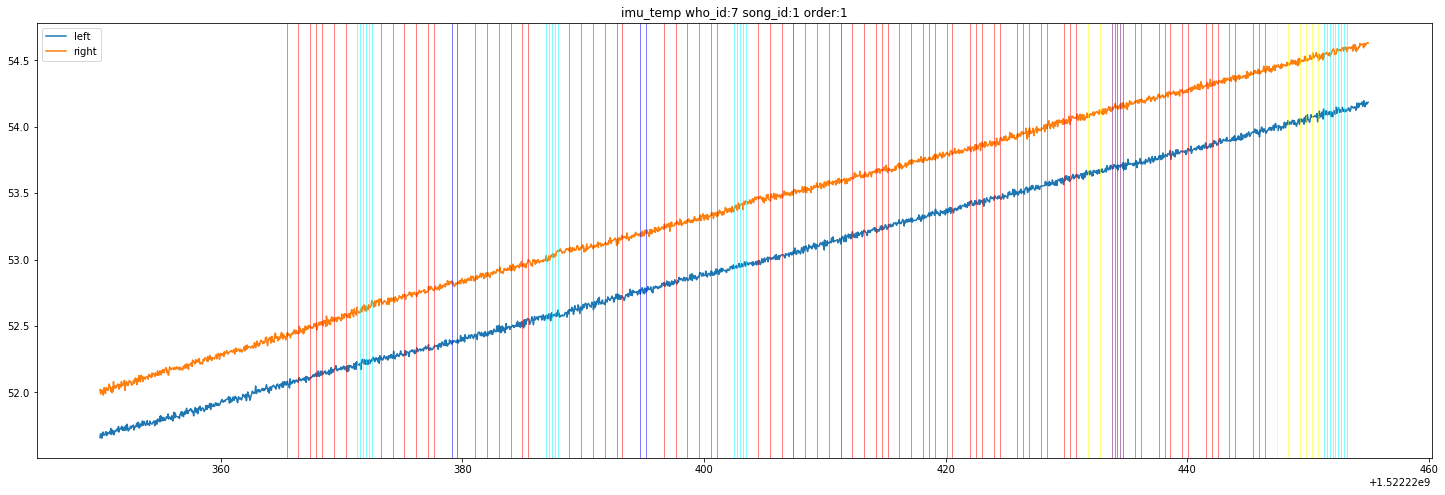

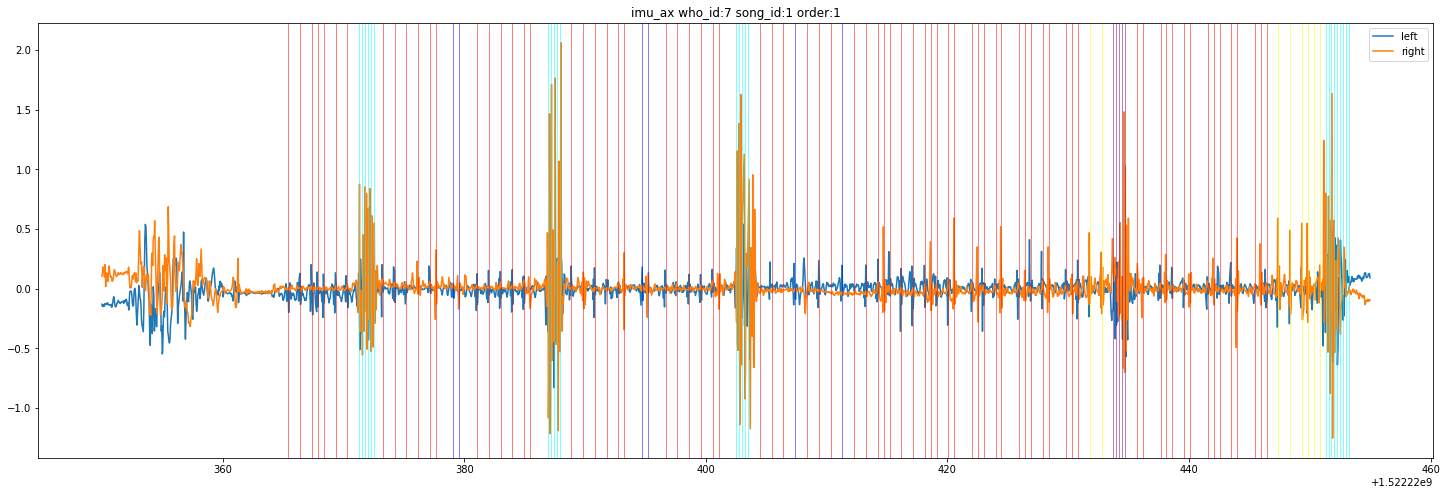

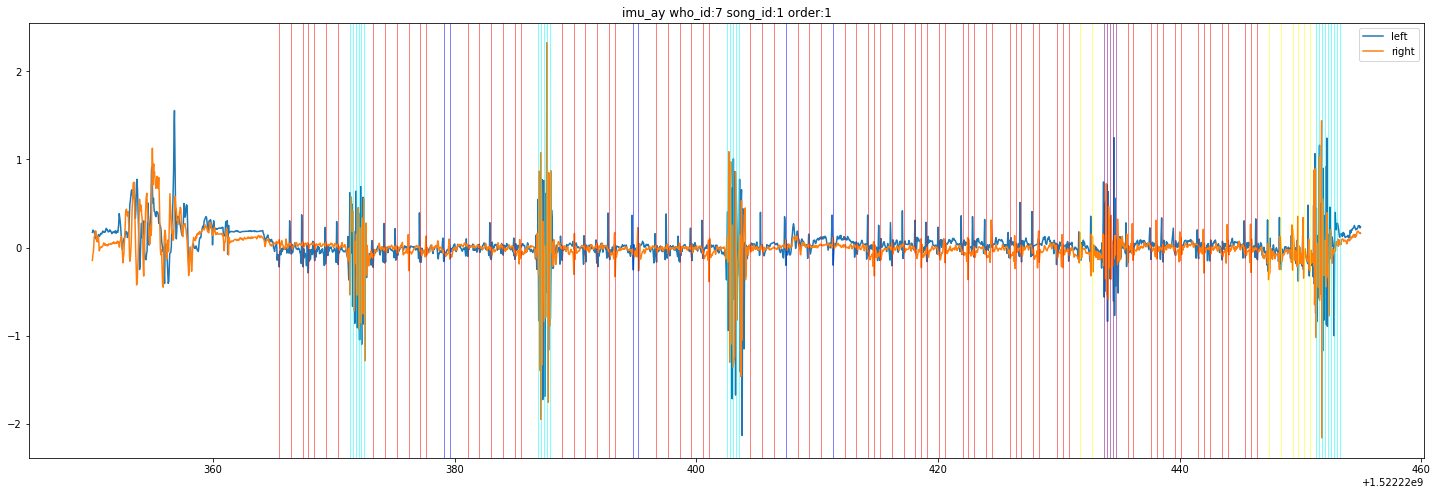

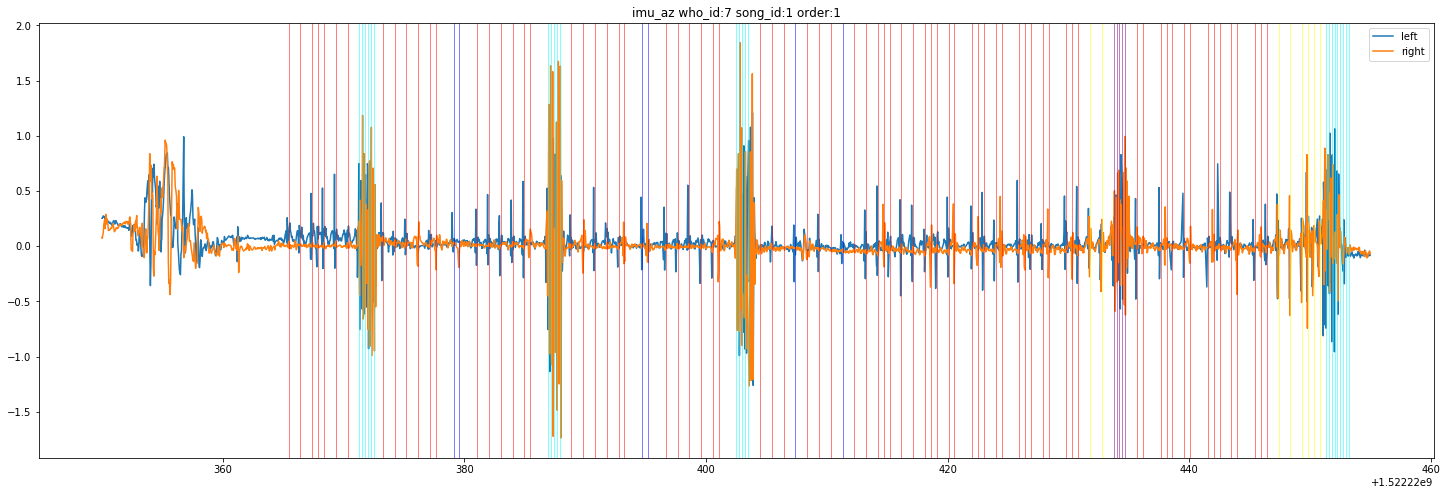

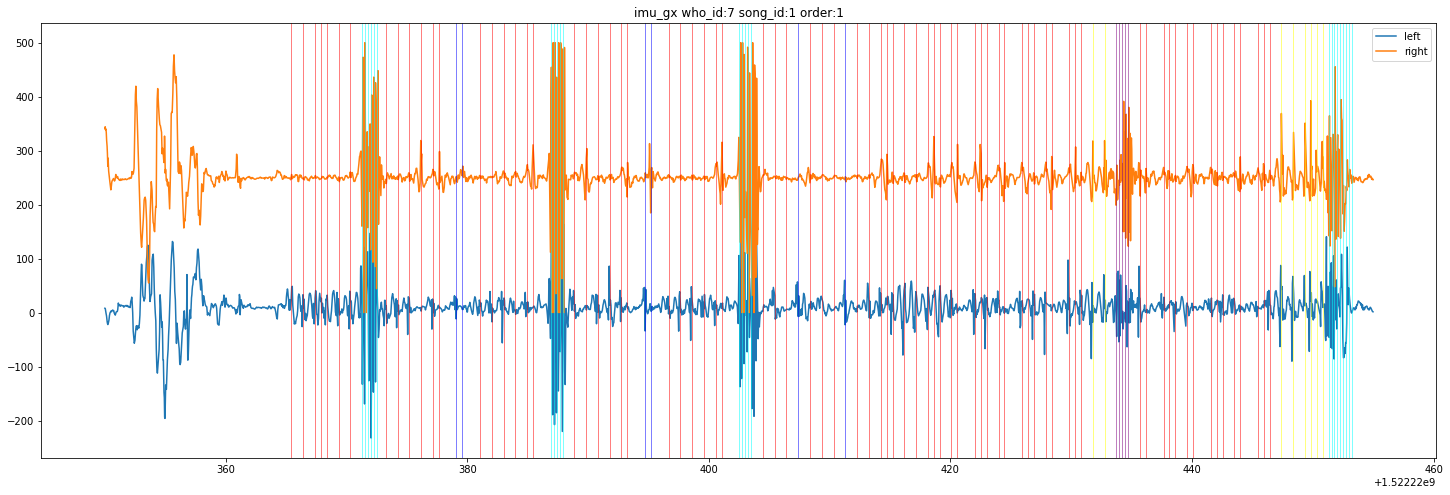

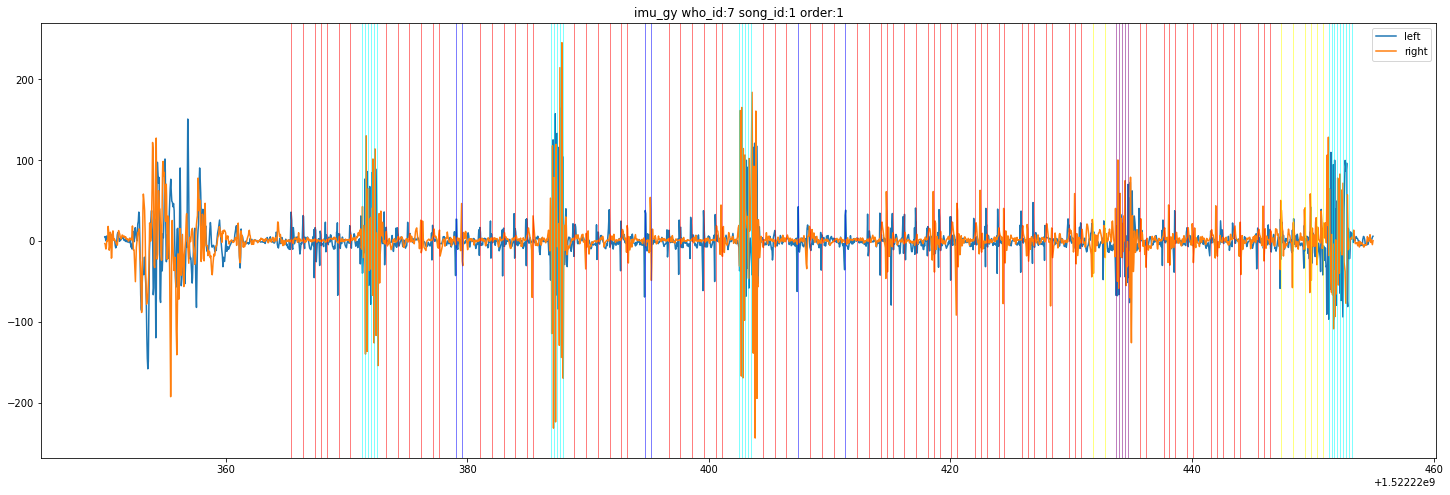

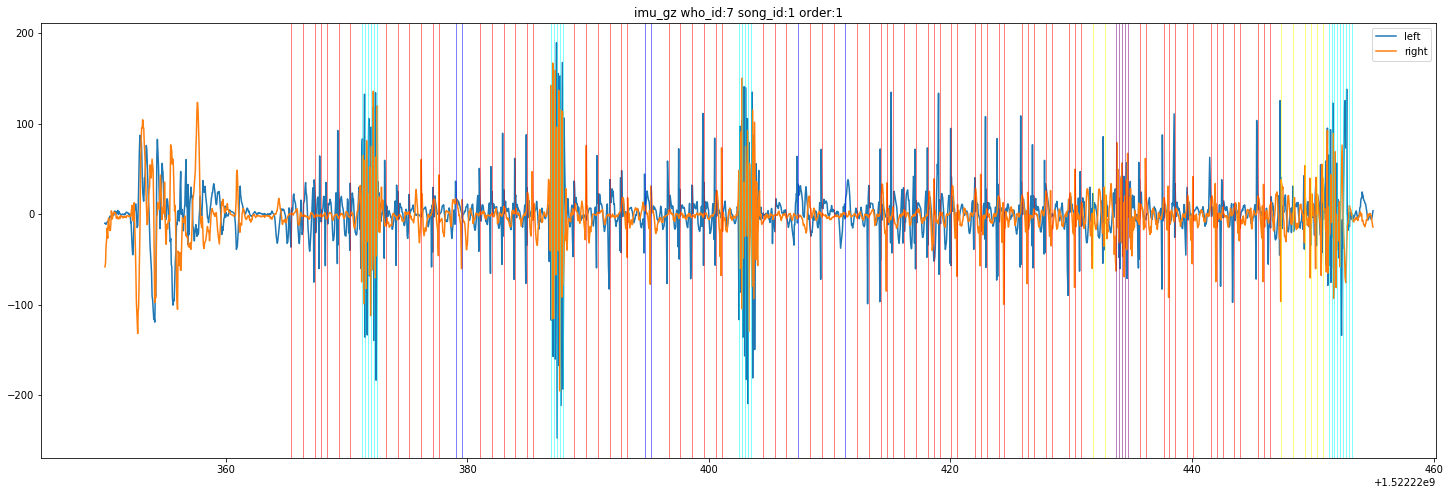

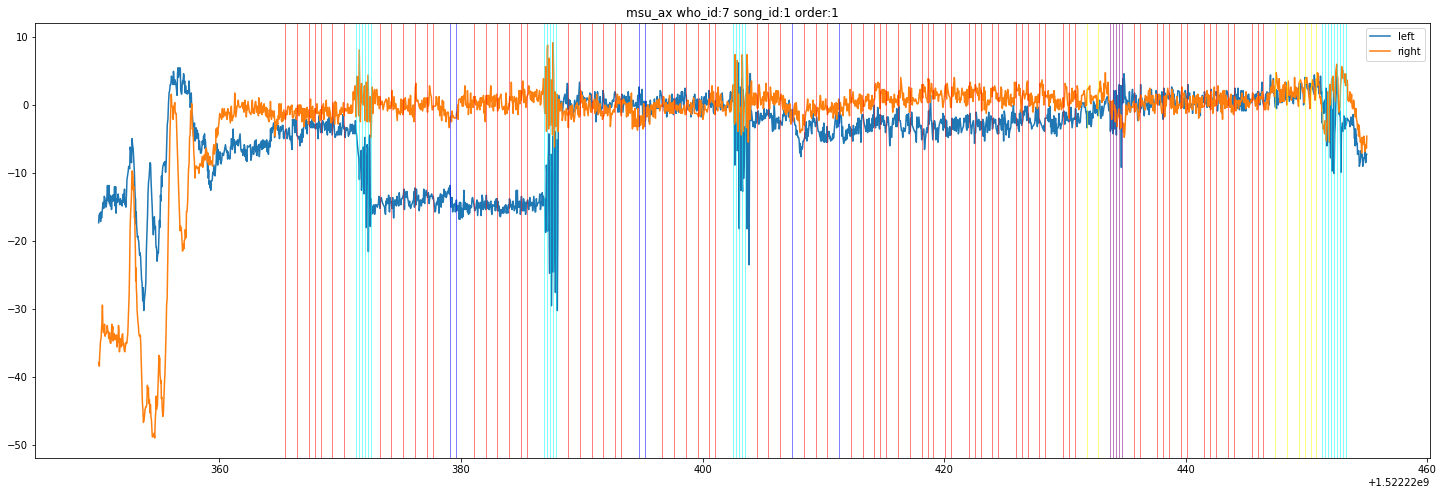

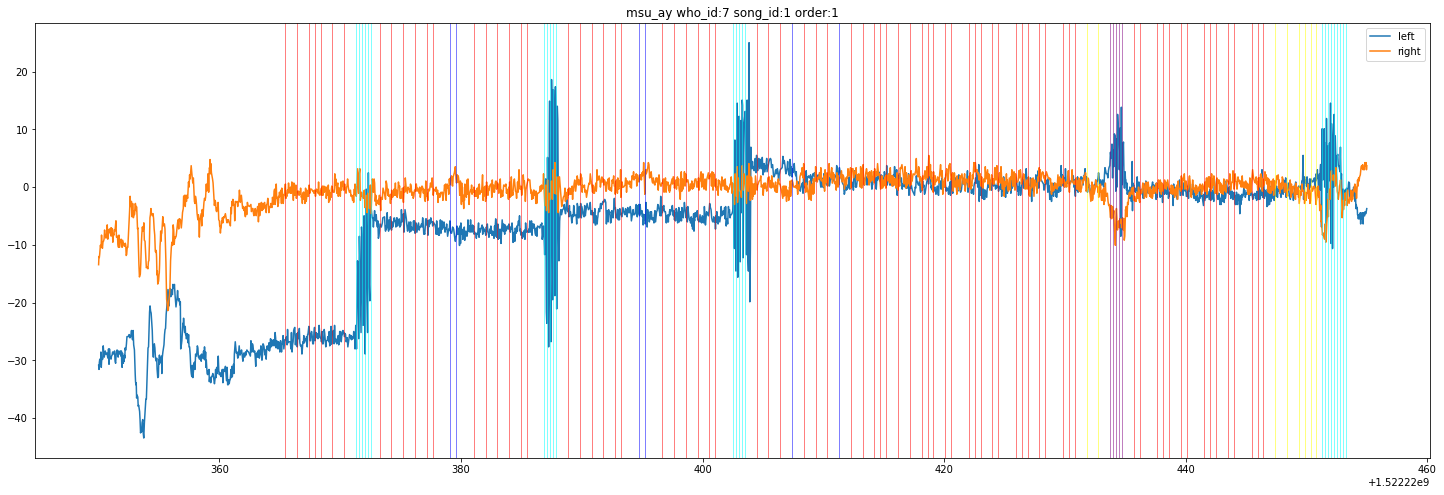

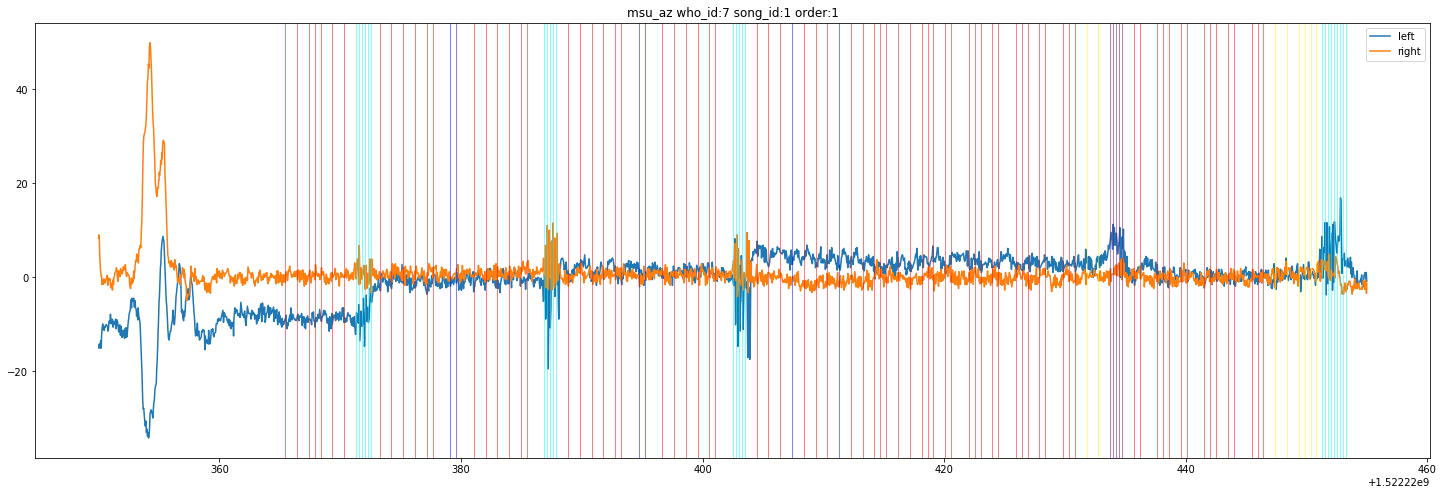

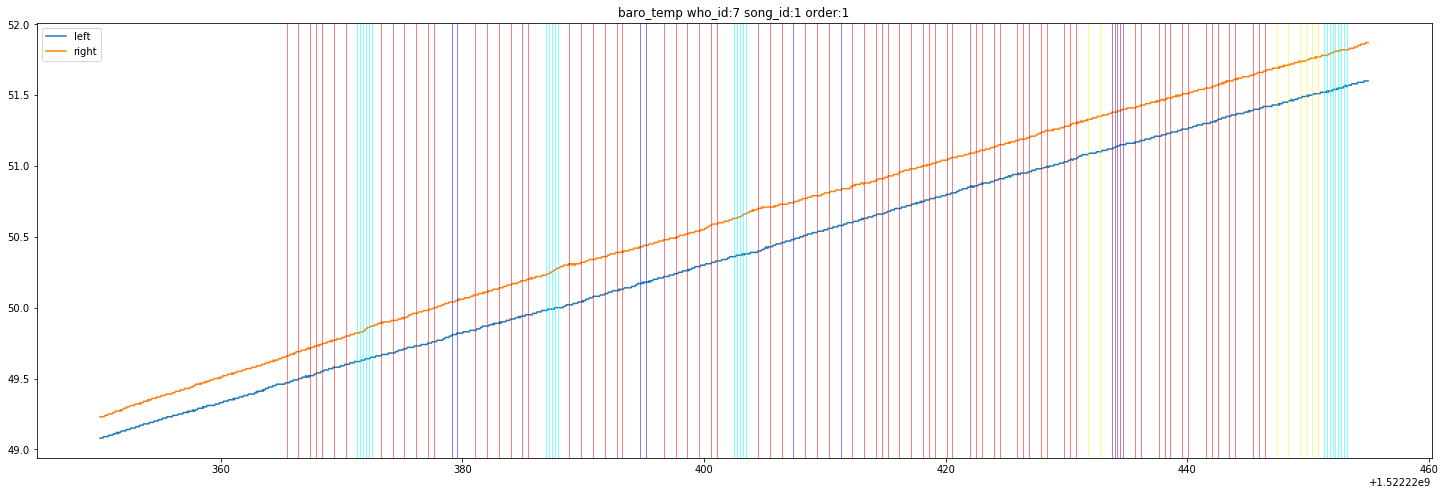

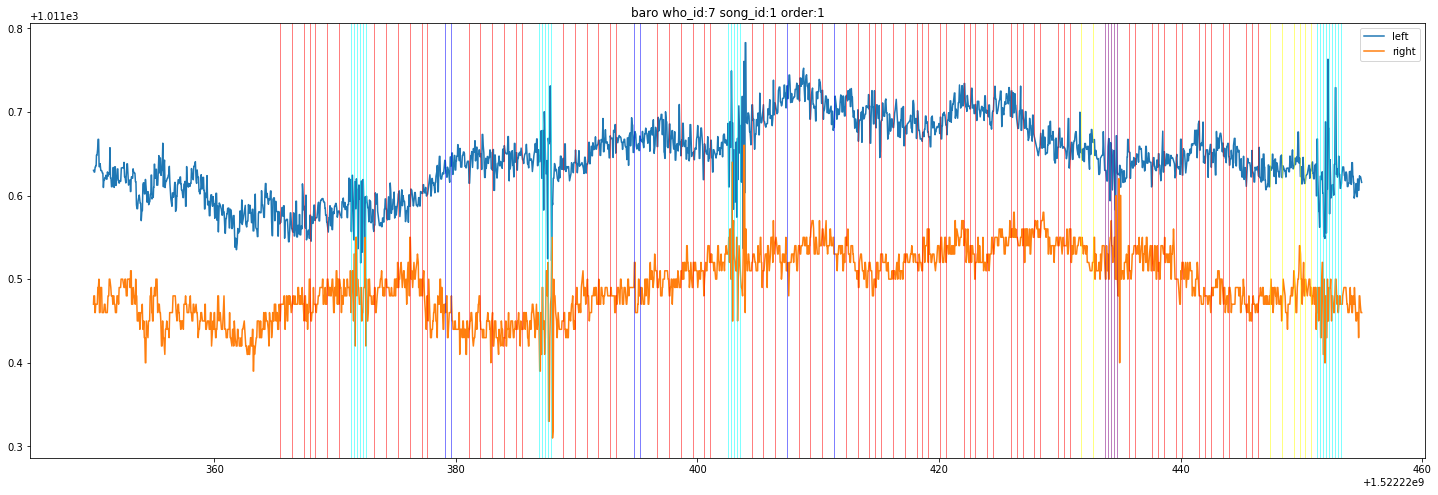

In [6]:
pfs[0].plot_global_event()

In [7]:
# for i in range(len(pfs)):
#     print(pfs[i].primitive_df)
pfs[2].primitive_df

,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,R_AAI,R_AVI,R_ASMA,R_GAI,R_GVI,R_GSMA,R_AAE,R_ARE
0,0.303396,0.000000e+00,0.495000,37.237233,0.000000,49.354000,0.092049,1386.611500,0.251527,9.237728e-05,0.3620,4.197606,0.393064,5.3790,0.063358,18.012963
1,0.312027,0.000000e+00,0.527000,39.027239,0.000000,49.461000,0.097361,1523.125373,0.219723,5.873981e-05,0.3120,4.710803,2.035560,6.9350,0.048337,24.227228
2,0.303014,1.452910e-05,0.506000,34.633223,0.680145,46.642000,0.091832,1200.140291,0.167701,3.912165e-04,0.2490,12.554437,1.047164,17.7730,0.028515,158.661050
3,0.325286,0.000000e+00,0.551000,37.297853,0.000000,47.501000,0.105811,1391.129819,0.105167,2.579297e-04,0.1490,27.398464,6.003235,40.4555,0.011318,756.679087
4,0.311835,0.000000e+00,0.529000,35.221079,0.000000,50.949000,0.097241,1240.524393,0.048547,1.882029e-04,0.0660,65.023929,231.976262,91.0495,0.002545,4460.087613
5,0.325382,5.271780e-05,0.548000,30.357100,3.260822,44.582500,0.105926,924.814313,0.184034,1.903388e-04,0.2850,128.691021,162.291729,175.1640,0.034059,16723.670680
6,0.331557,0.000000e+00,0.554000,28.033502,0.000000,34.607000,0.109930,785.877245,0.234028,8.584227e-04,0.3635,178.072793,55.185624,242.7640,0.055628,31765.105275
7,0.321741,3.220102e-05,0.527500,30.745422,1.624469,39.554000,0.103550,946.905423,0.394125,1.296733e-03,0.6150,208.529607,43.813408,286.2135,0.156631,43528.410501
8,0.307182,0.000000e+00,0.505000,31.446666,0.000000,45.814000,0.094361,988.892798,0.450191,7.388783e-05,0.6735,215.669276,11.570216,303.3110,0.202745,46524.806798
9,0.314428,0.000000e+00,0.529000,30.131856,0.000000,44.502000,0.098865,907.928726,0.386419,0.000000e+00,0.6040,204.035575,0.000000,316.0560,0.149320,41630.515976


In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 5, 6], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:43<00:00,  3.49it/s]

let's go centroid=10, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:43<00:00,  3.48it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.02916667 0.925      0.         0.         0.04583333 0.        ]
 [0.02597403 0.97402597 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


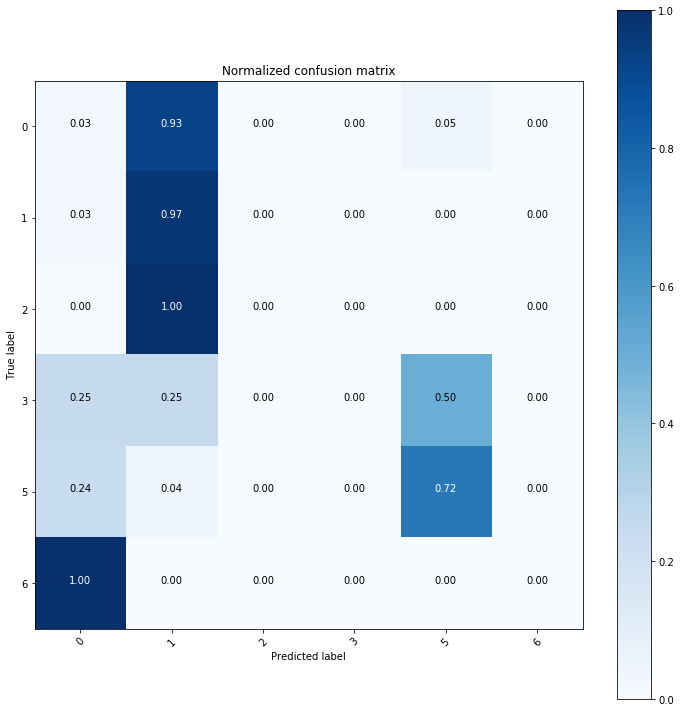

predicting 2 performance


100%|██████████| 361/361 [01:43<00:00,  3.48it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.05       0.92083333 0.         0.         0.02916667 0.        ]
 [0.01298701 0.98701299 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


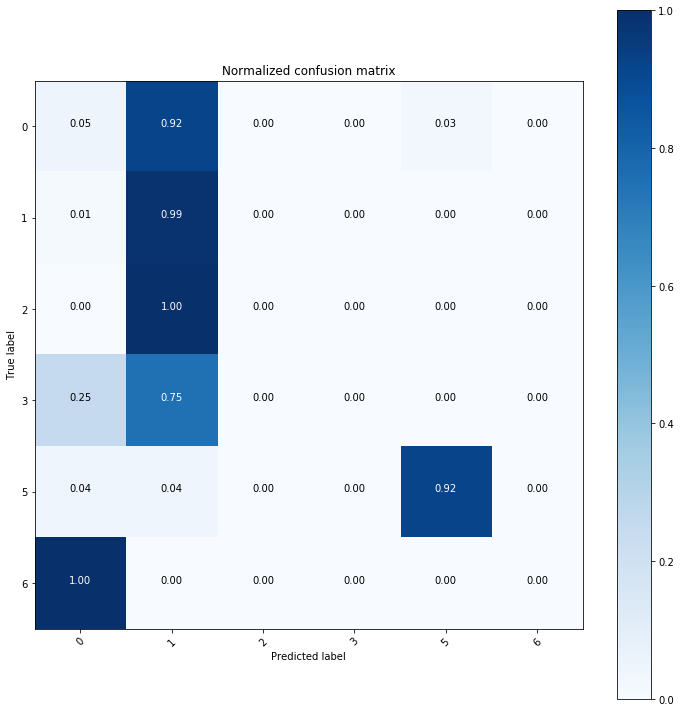

predicting 3 performance


100%|██████████| 361/361 [01:43<00:00,  3.47it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.38961039 0.61038961 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


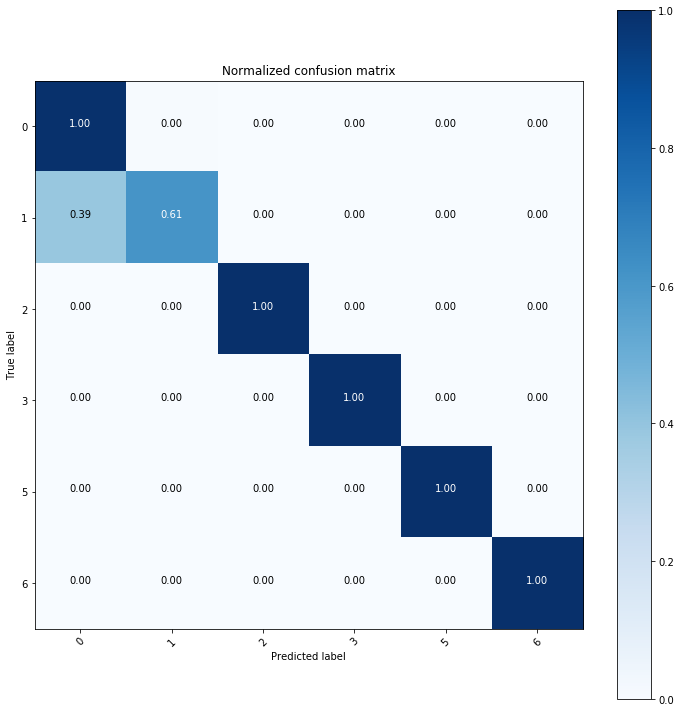

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:43<00:00,  3.48it/s]

let's go centroid=10, C=250.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:44<00:00,  3.44it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.02916667 0.925      0.         0.         0.04583333 0.        ]
 [0.02597403 0.97402597 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


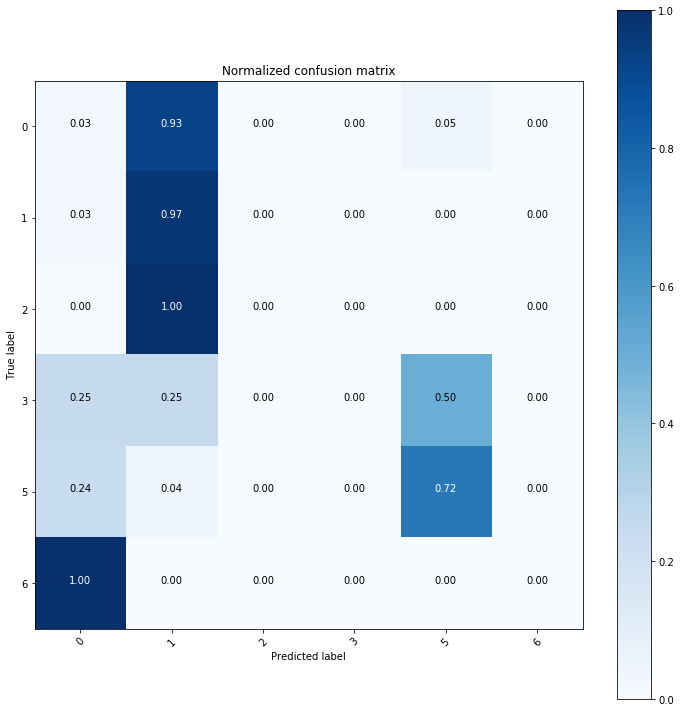

predicting 2 performance


100%|██████████| 361/361 [01:43<00:00,  3.49it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.05       0.92083333 0.         0.         0.02916667 0.        ]
 [0.01298701 0.98701299 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


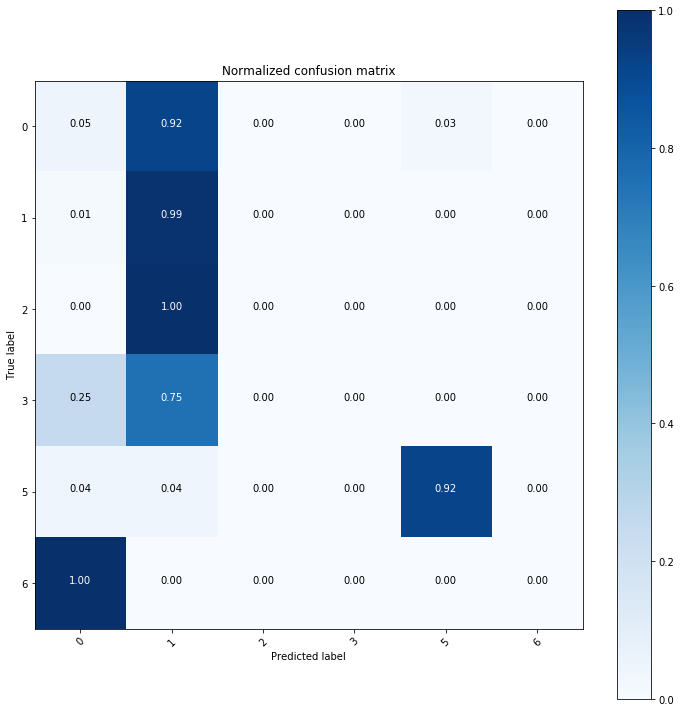

predicting 3 performance


100%|██████████| 361/361 [01:44<00:00,  3.47it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.20779221 0.79220779 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


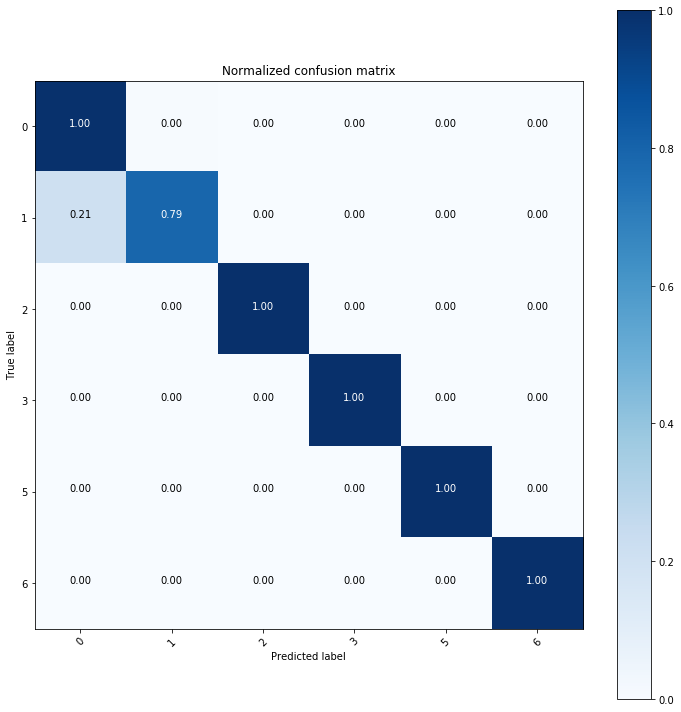

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:43<00:00,  3.49it/s]

let's go centroid=10, C=500.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:39<00:00,  3.64it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.02916667 0.925      0.         0.         0.04583333 0.        ]
 [0.02597403 0.97402597 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


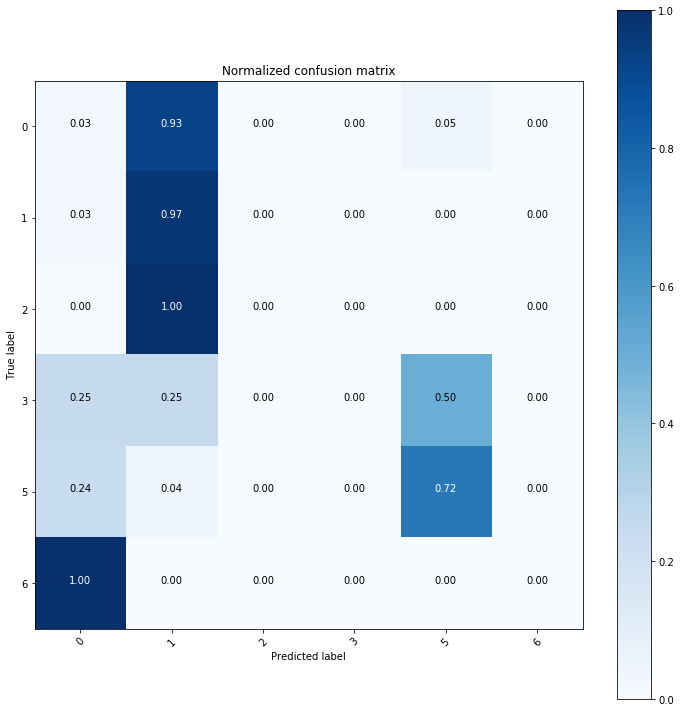

predicting 2 performance


100%|██████████| 361/361 [01:37<00:00,  3.69it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.05       0.92083333 0.         0.         0.02916667 0.        ]
 [0.01298701 0.98701299 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


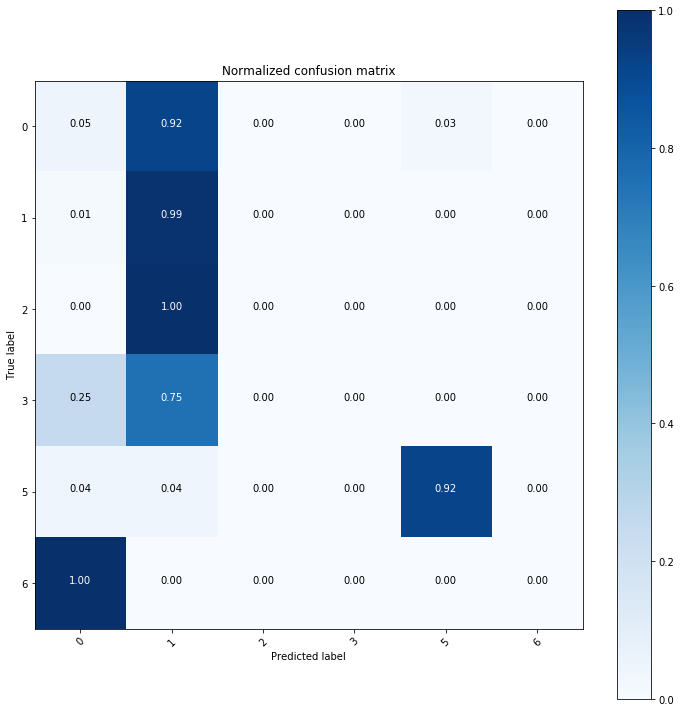

predicting 3 performance


100%|██████████| 361/361 [01:38<00:00,  3.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.11688312 0.88311688 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


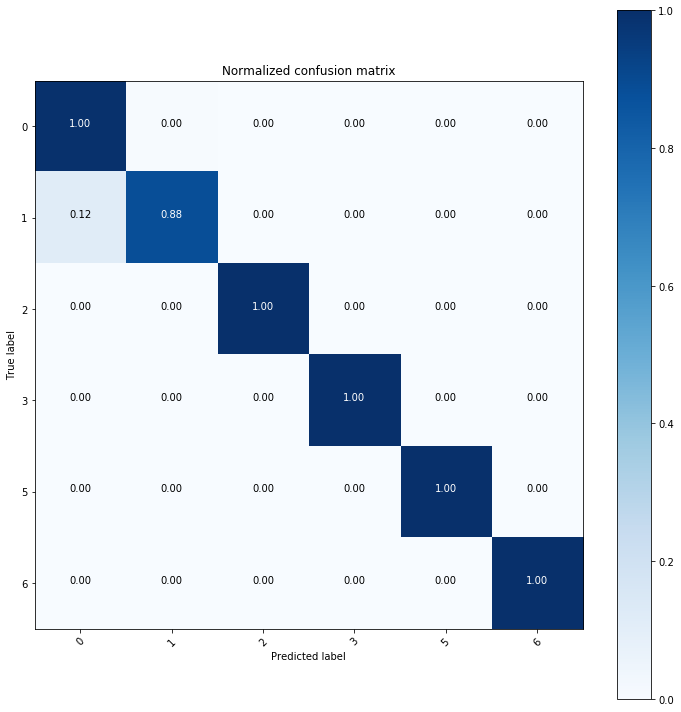

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:37<00:00,  3.69it/s]

let's go centroid=10, C=750.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:38<00:00,  3.67it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.24583333 0.70833333 0.         0.         0.04583333 0.        ]
 [0.20779221 0.79220779 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


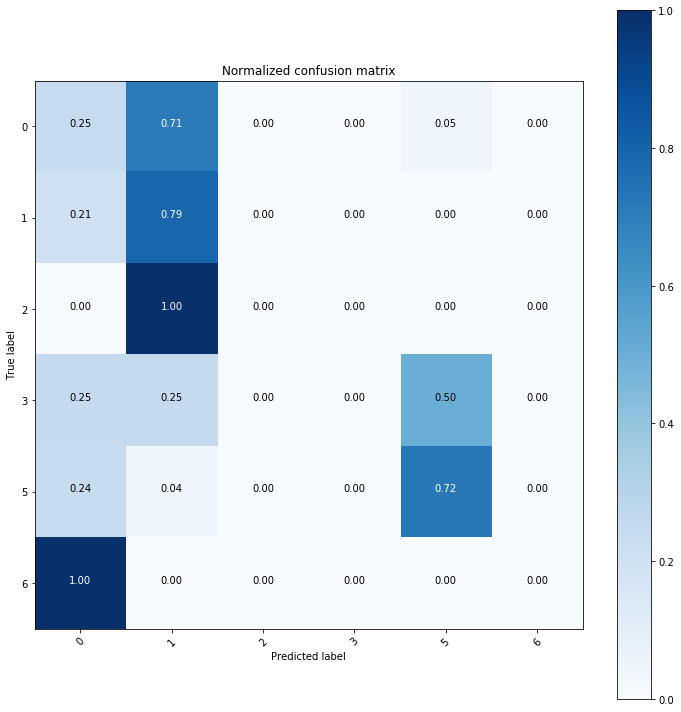

predicting 2 performance


100%|██████████| 361/361 [01:37<00:00,  3.69it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.1875     0.78333333 0.         0.         0.02916667 0.        ]
 [0.15584416 0.84415584 0.         0.         0.         0.        ]
 [0.16666667 0.83333333 0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


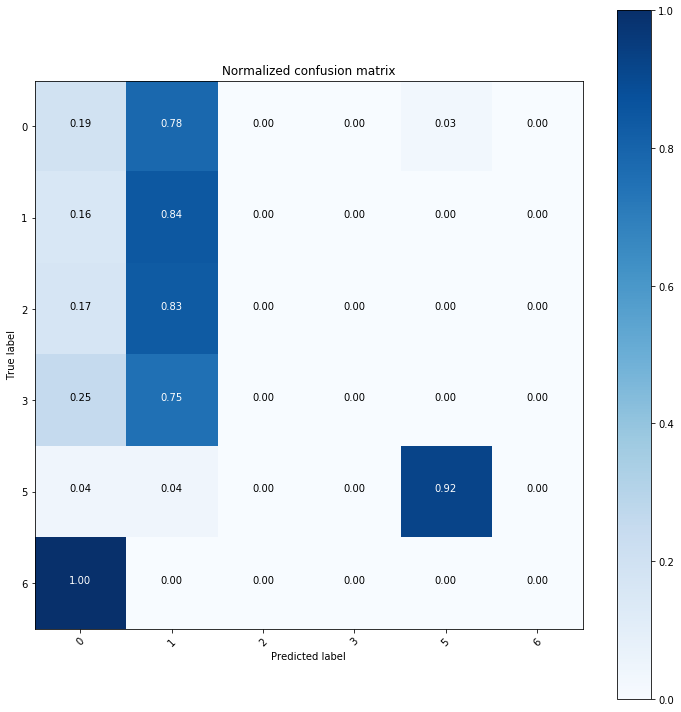

predicting 3 performance


100%|██████████| 361/361 [01:38<00:00,  3.67it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.07792208 0.92207792 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


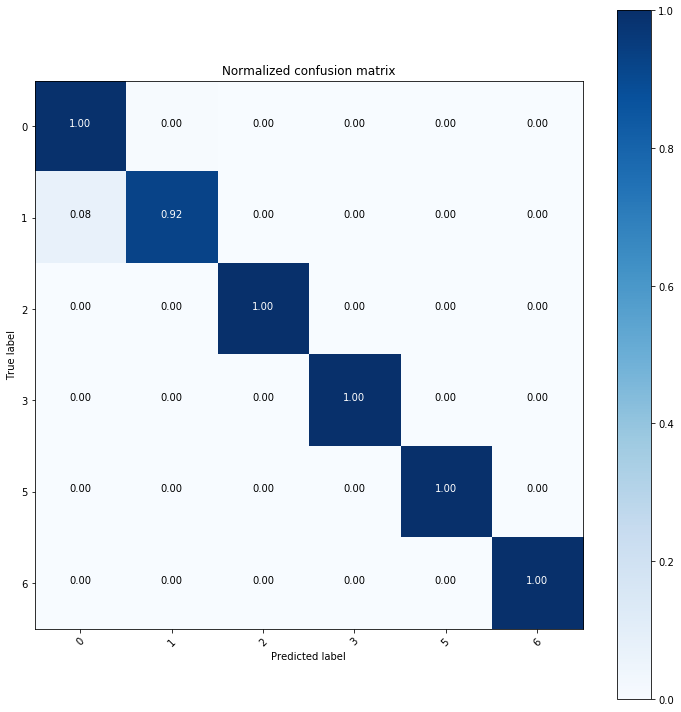

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:37<00:00,  3.69it/s]

let's go centroid=30, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:37<00:00,  3.69it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.02916667 0.925      0.         0.         0.04583333 0.        ]
 [0.02597403 0.97402597 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


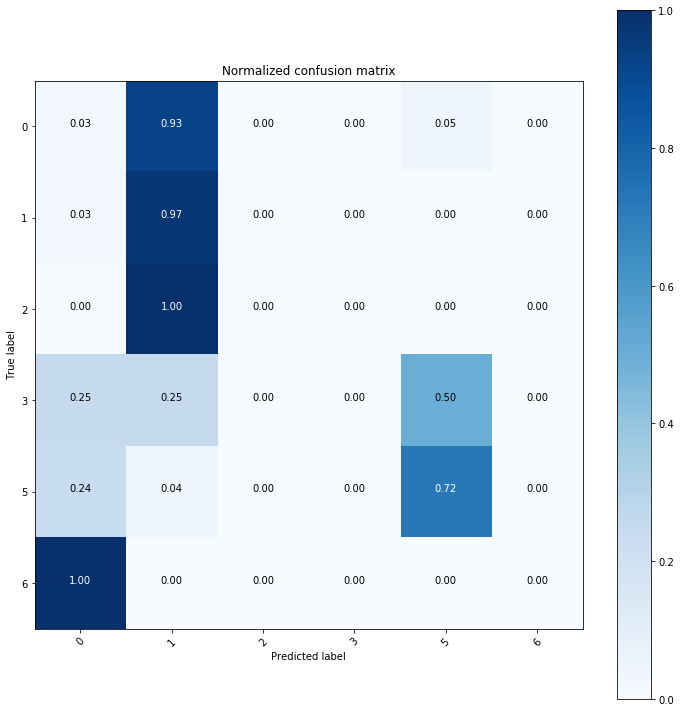

predicting 2 performance


100%|██████████| 361/361 [01:37<00:00,  3.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.05       0.92083333 0.         0.         0.02916667 0.        ]
 [0.01298701 0.98701299 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


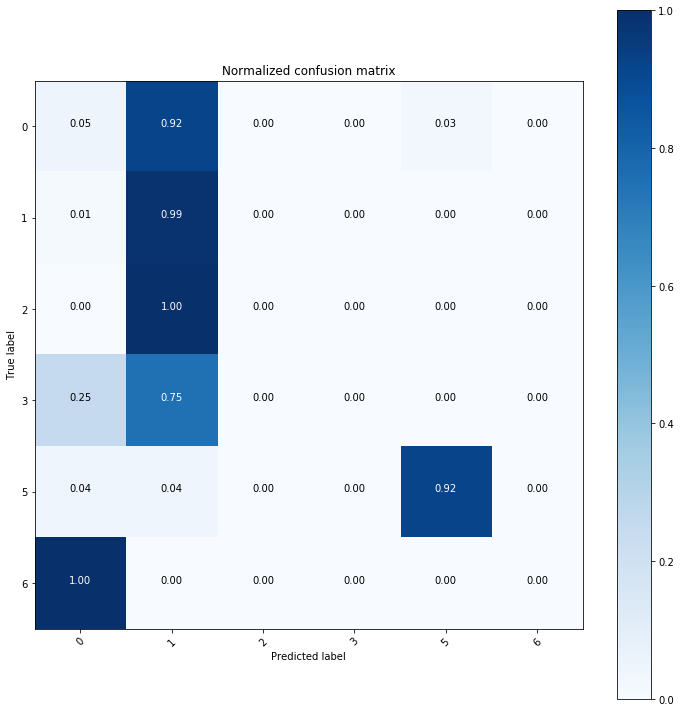

predicting 3 performance


100%|██████████| 361/361 [01:38<00:00,  3.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.38961039 0.61038961 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


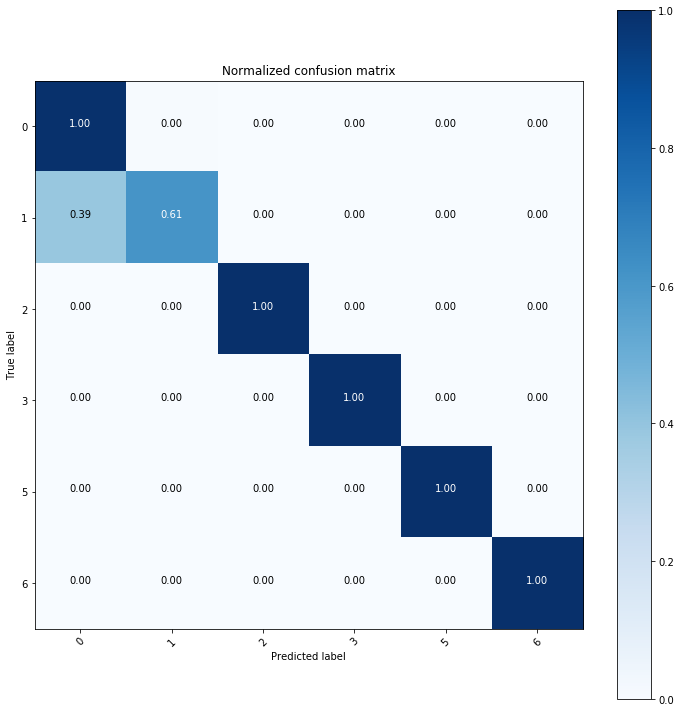

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:37<00:00,  3.70it/s]

let's go centroid=30, C=250.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:37<00:00,  3.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.02916667 0.925      0.         0.         0.04583333 0.        ]
 [0.02597403 0.97402597 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


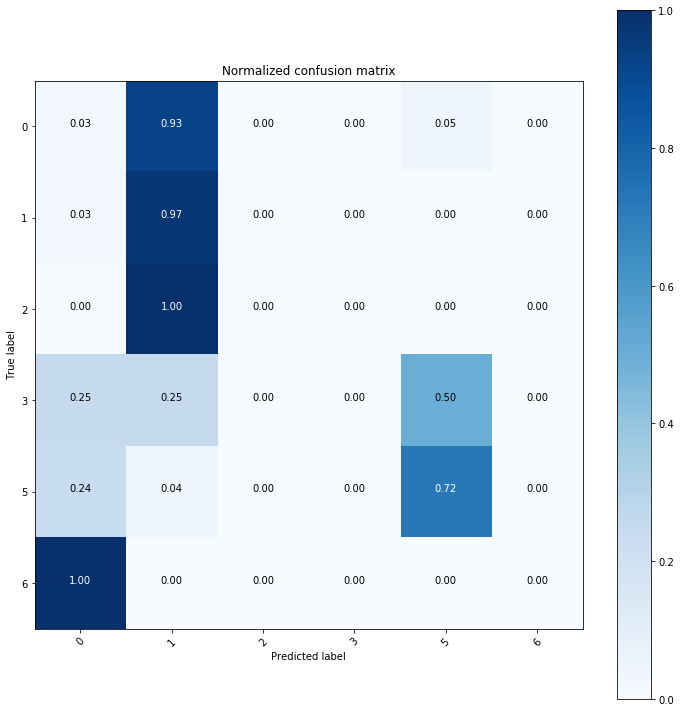

predicting 2 performance


100%|██████████| 361/361 [01:37<00:00,  3.69it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.05       0.92083333 0.         0.         0.02916667 0.        ]
 [0.01298701 0.98701299 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


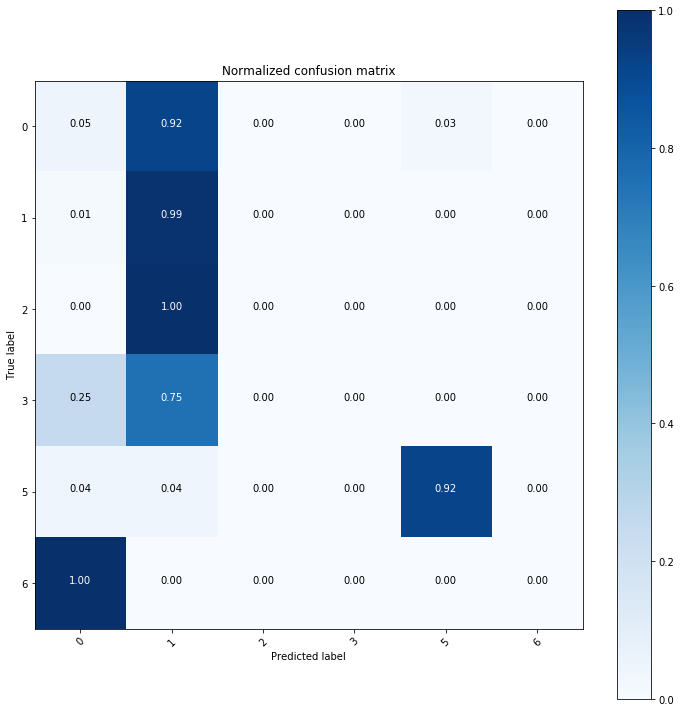

predicting 3 performance


100%|██████████| 361/361 [01:38<00:00,  3.67it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.20779221 0.79220779 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


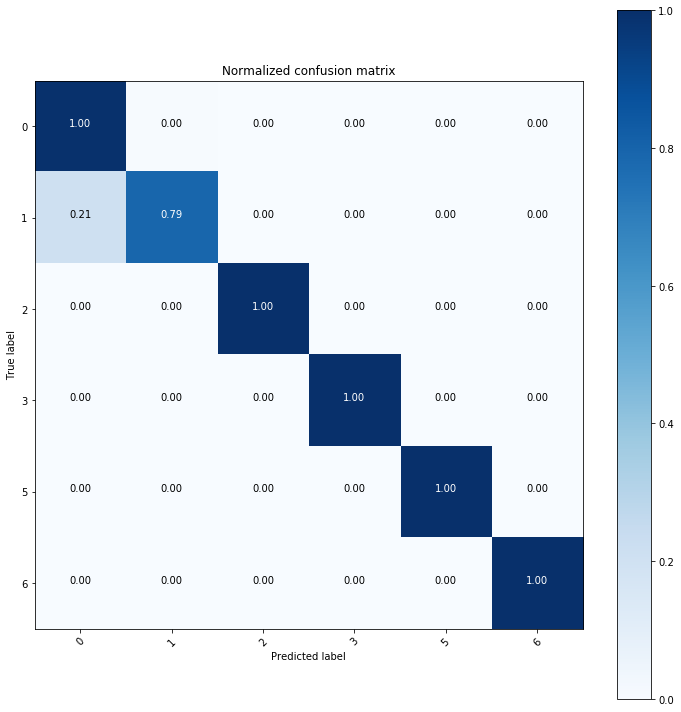

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:37<00:00,  3.70it/s]

let's go centroid=30, C=500.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:37<00:00,  3.70it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.02916667 0.925      0.         0.         0.04583333 0.        ]
 [0.02597403 0.97402597 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


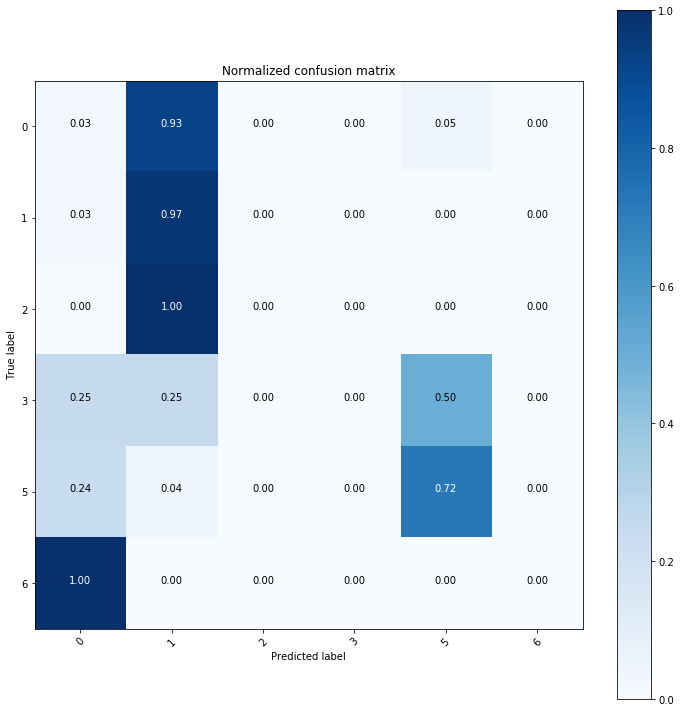

predicting 2 performance


100%|██████████| 361/361 [01:37<00:00,  3.70it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.05       0.92083333 0.         0.         0.02916667 0.        ]
 [0.01298701 0.98701299 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


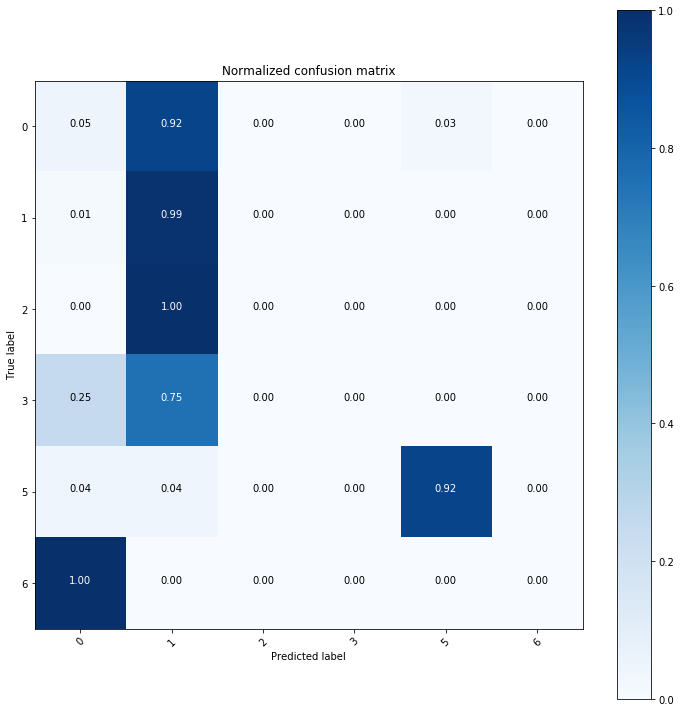

predicting 3 performance


100%|██████████| 361/361 [01:37<00:00,  3.69it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.11688312 0.88311688 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


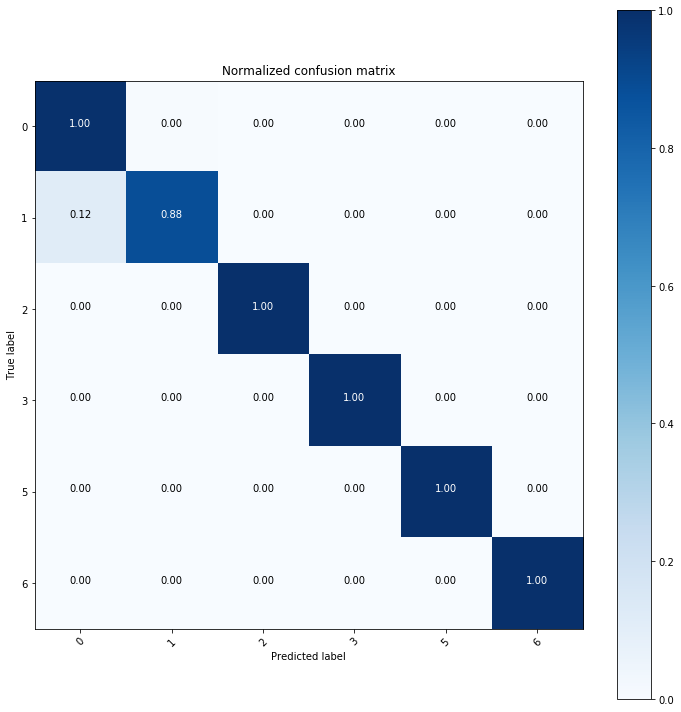

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:37<00:00,  3.72it/s]

let's go centroid=30, C=750.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:38<00:00,  3.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.24583333 0.70833333 0.         0.         0.04583333 0.        ]
 [0.20779221 0.79220779 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


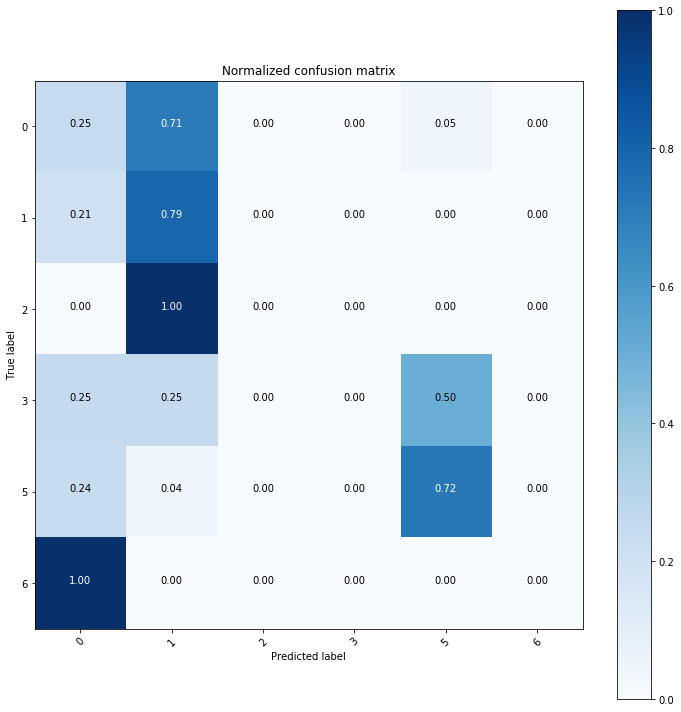

predicting 2 performance


100%|██████████| 361/361 [01:37<00:00,  3.71it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.1875     0.78333333 0.         0.         0.02916667 0.        ]
 [0.15584416 0.84415584 0.         0.         0.         0.        ]
 [0.16666667 0.83333333 0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


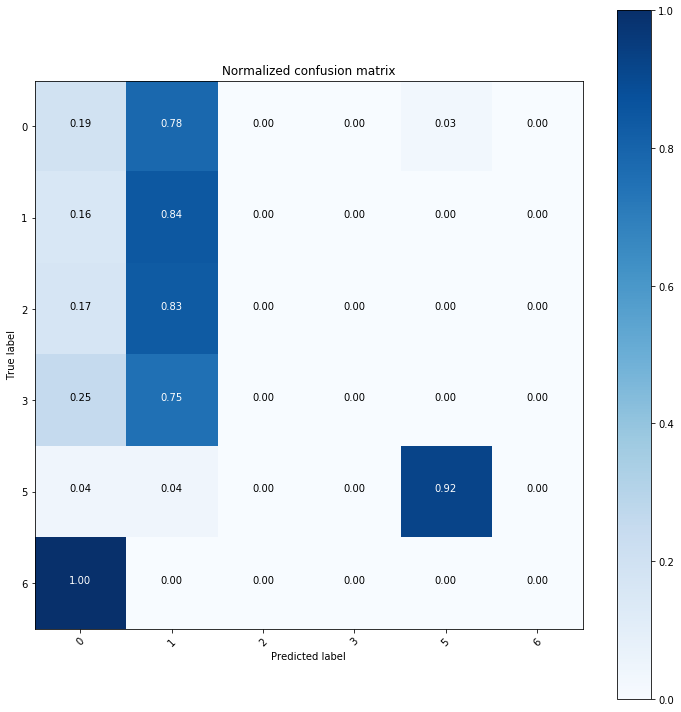

predicting 3 performance


100%|██████████| 361/361 [01:38<00:00,  3.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.07792208 0.92207792 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


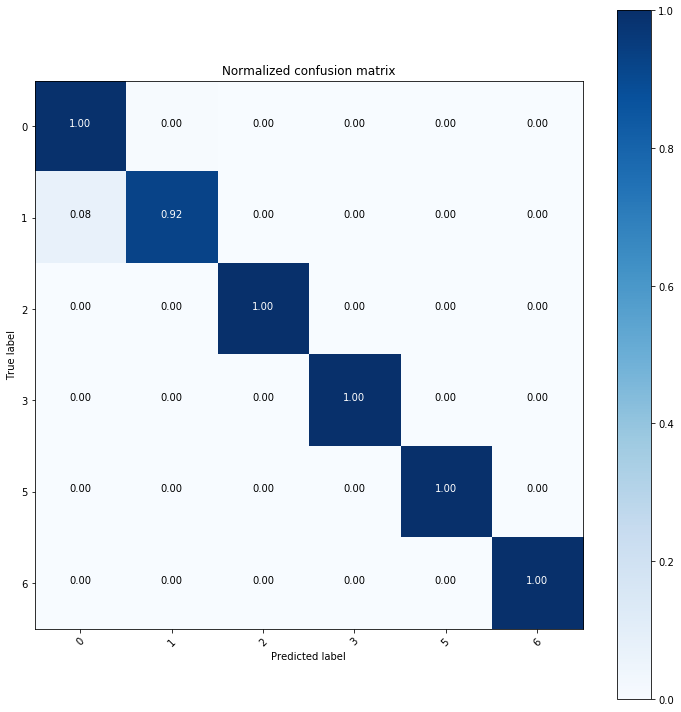

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:37<00:00,  3.70it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:38<00:00,  3.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.02916667 0.925      0.         0.         0.04583333 0.        ]
 [0.02597403 0.97402597 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


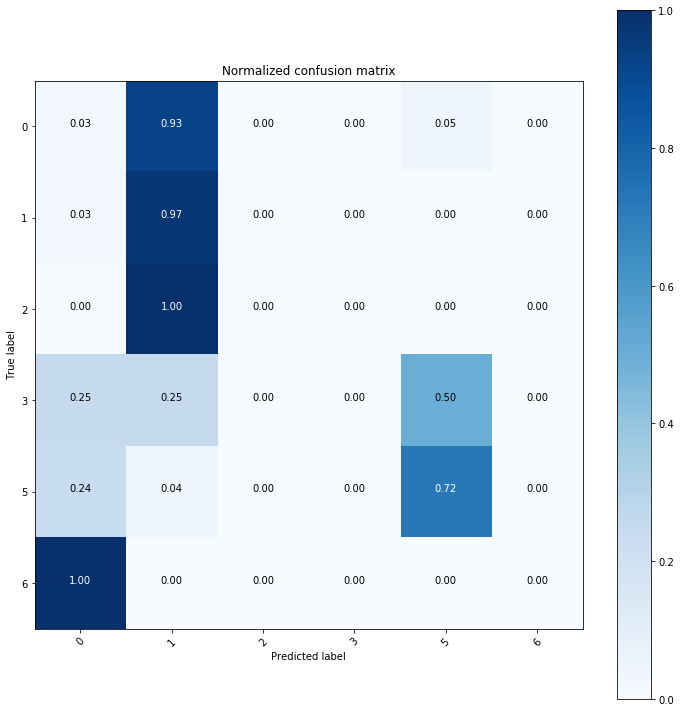

predicting 2 performance


100%|██████████| 361/361 [01:37<00:00,  3.69it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.05       0.92083333 0.         0.         0.02916667 0.        ]
 [0.01298701 0.98701299 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


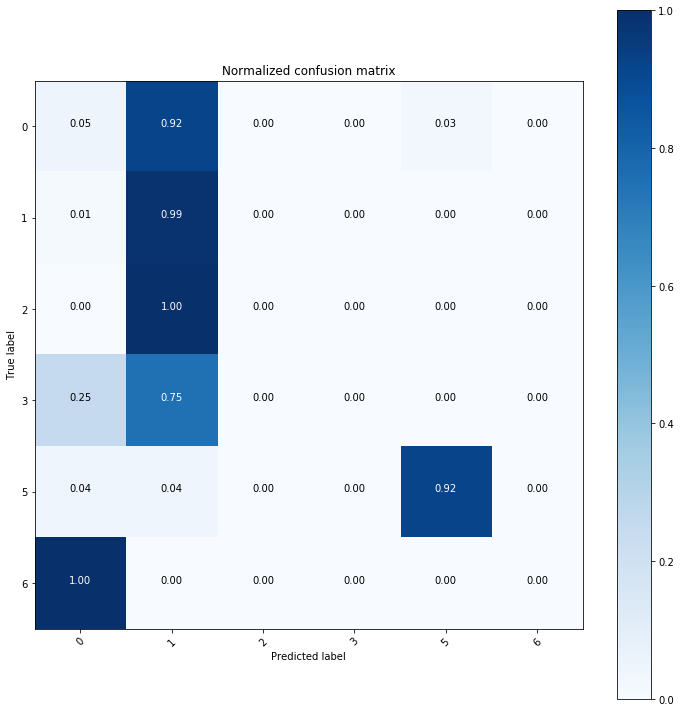

predicting 3 performance


100%|██████████| 361/361 [01:37<00:00,  3.70it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.38961039 0.61038961 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


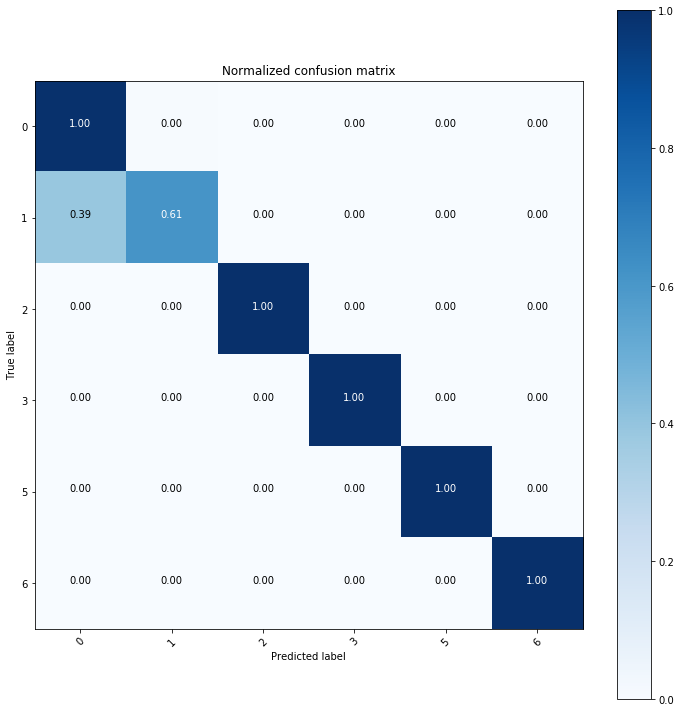

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:37<00:00,  3.71it/s]

let's go centroid=50, C=250.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:38<00:00,  3.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.02916667 0.925      0.         0.         0.04583333 0.        ]
 [0.02597403 0.97402597 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


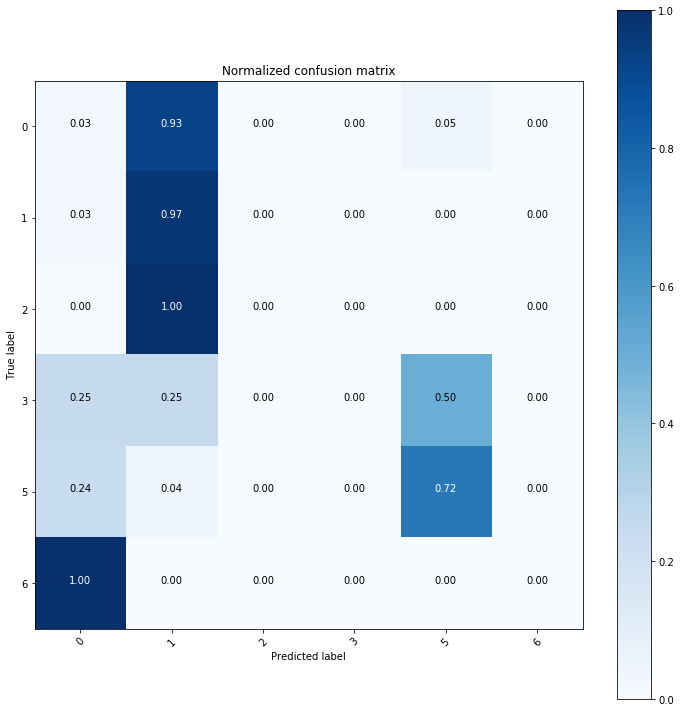

predicting 2 performance


100%|██████████| 361/361 [01:37<00:00,  3.70it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.05       0.92083333 0.         0.         0.02916667 0.        ]
 [0.01298701 0.98701299 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


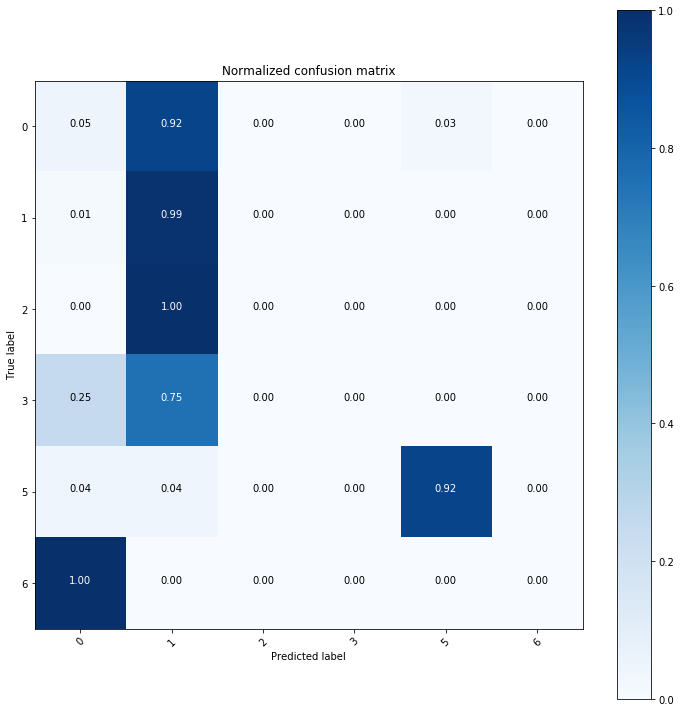

predicting 3 performance


100%|██████████| 361/361 [01:37<00:00,  3.69it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.20779221 0.79220779 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


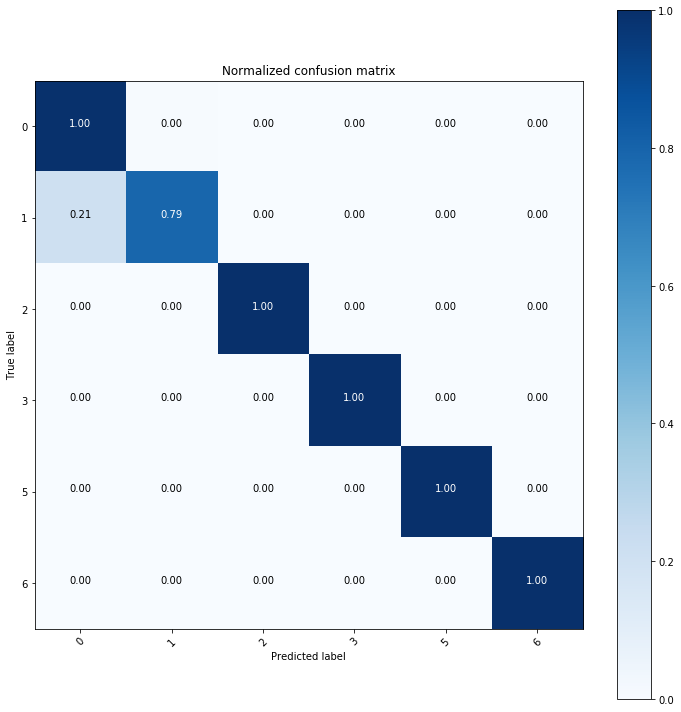

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:37<00:00,  3.69it/s]

let's go centroid=50, C=500.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:38<00:00,  3.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.02916667 0.925      0.         0.         0.04583333 0.        ]
 [0.02597403 0.97402597 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


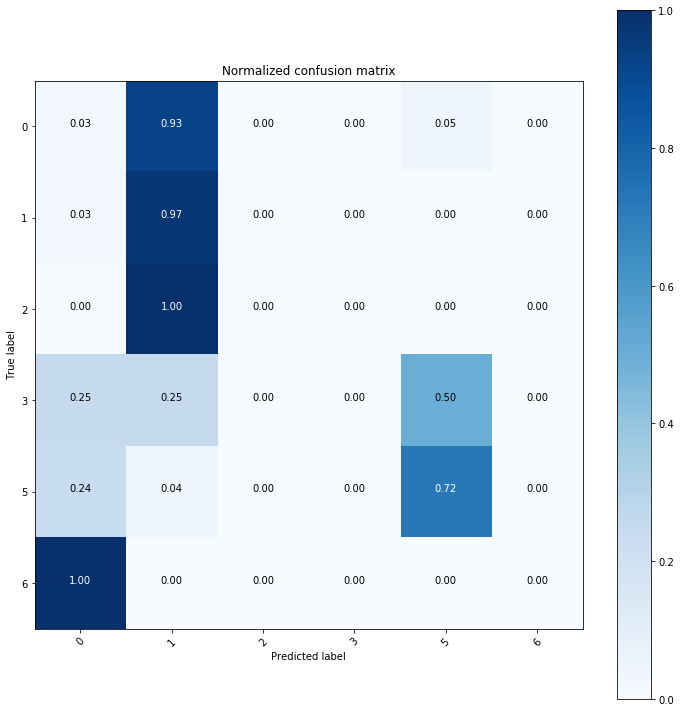

predicting 2 performance


100%|██████████| 361/361 [01:38<00:00,  3.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.05       0.92083333 0.         0.         0.02916667 0.        ]
 [0.01298701 0.98701299 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


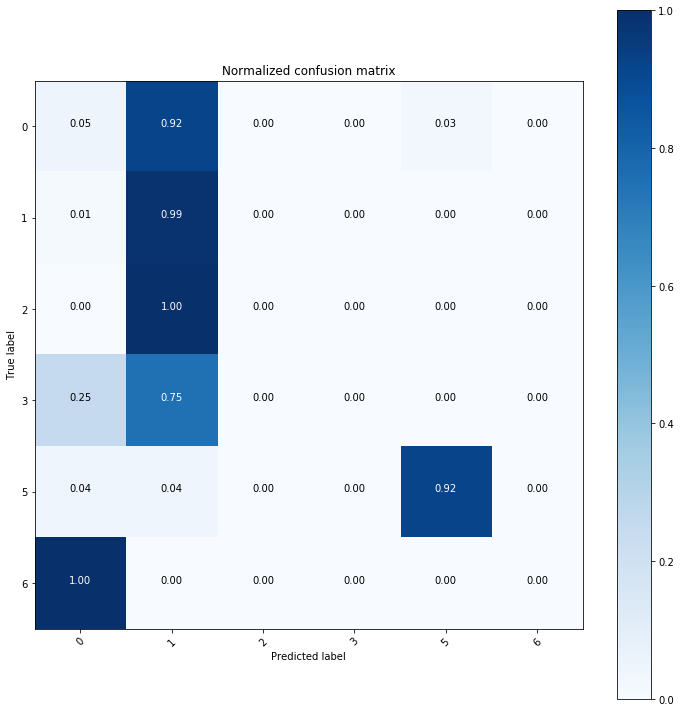

predicting 3 performance


100%|██████████| 361/361 [01:38<00:00,  3.67it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.11688312 0.88311688 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


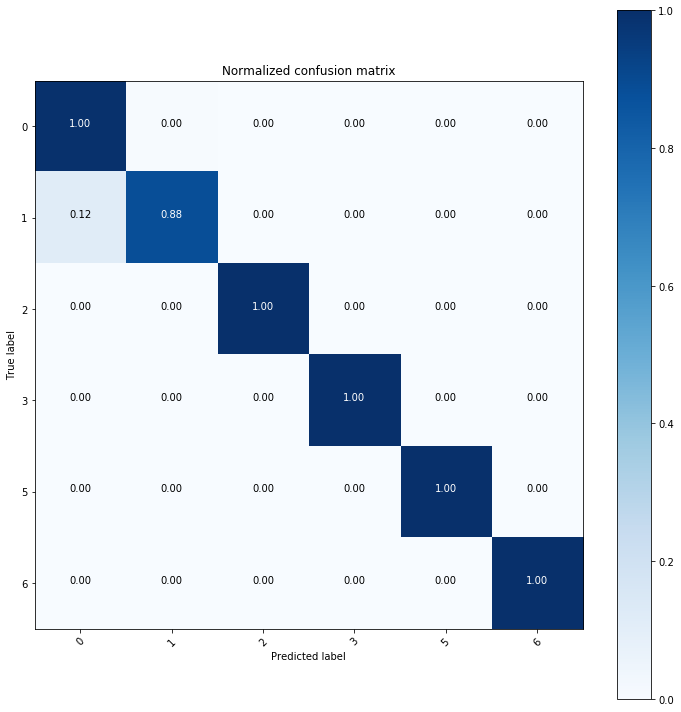

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:38<00:00,  3.68it/s]

let's go centroid=50, C=750.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:38<00:00,  3.67it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.24583333 0.70833333 0.         0.         0.04583333 0.        ]
 [0.20779221 0.79220779 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


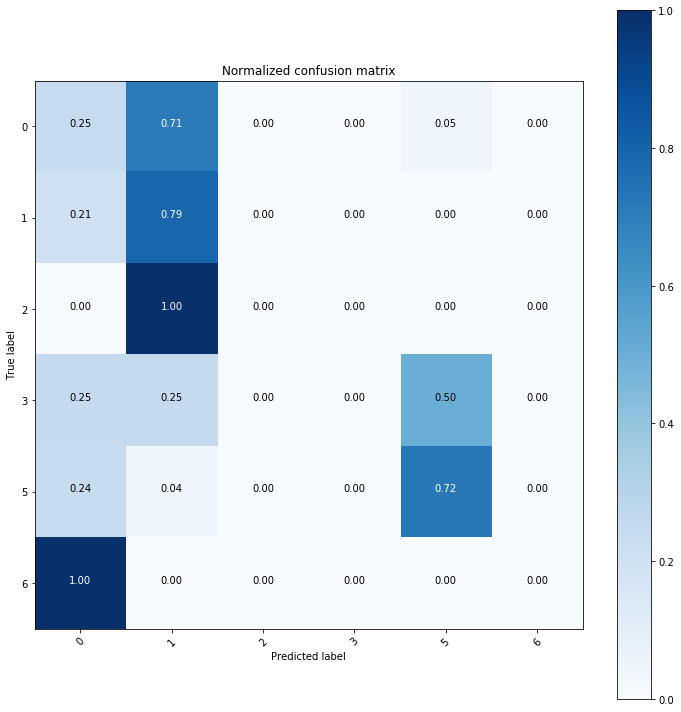

predicting 2 performance


100%|██████████| 361/361 [01:37<00:00,  3.70it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.1875     0.78333333 0.         0.         0.02916667 0.        ]
 [0.15584416 0.84415584 0.         0.         0.         0.        ]
 [0.16666667 0.83333333 0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


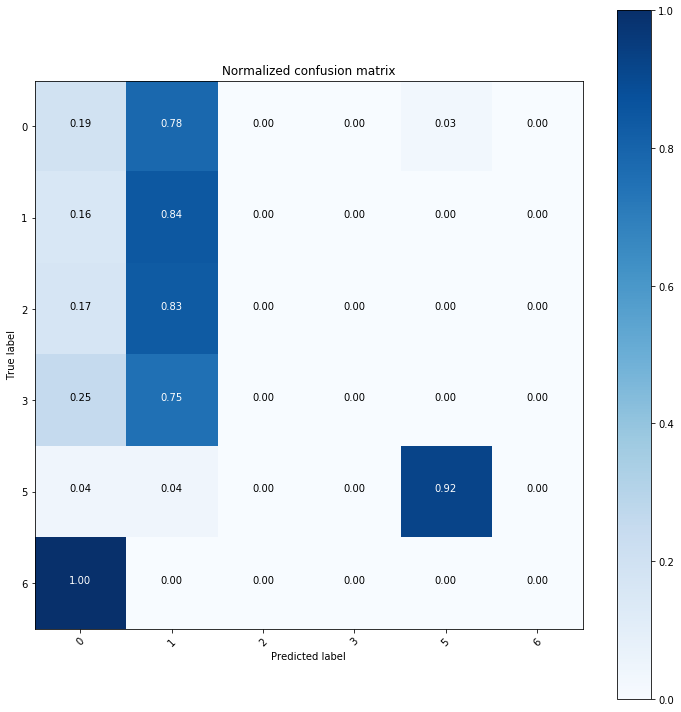

predicting 3 performance


100%|██████████| 361/361 [01:38<00:00,  3.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.07792208 0.92207792 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


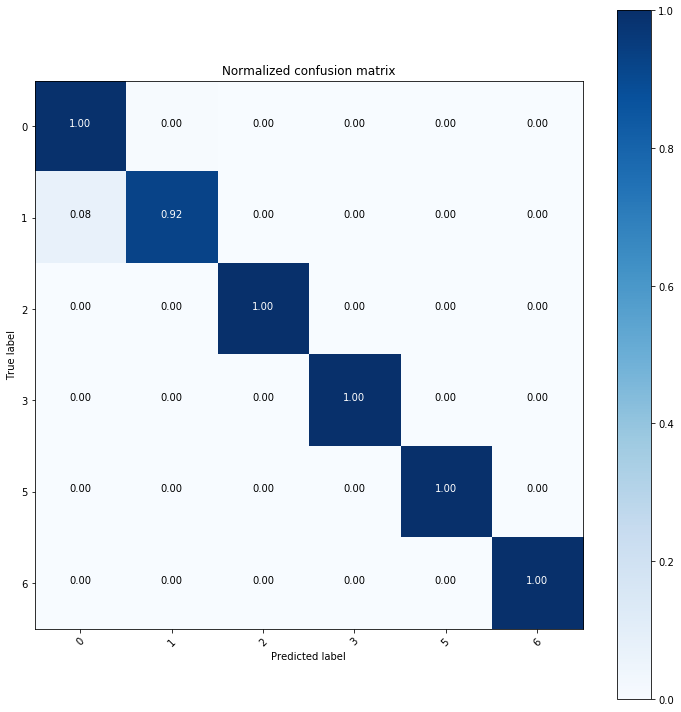

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:37<00:00,  3.70it/s]

let's go centroid=100, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:38<00:00,  3.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.02916667 0.925      0.         0.         0.04583333 0.        ]
 [0.02597403 0.97402597 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


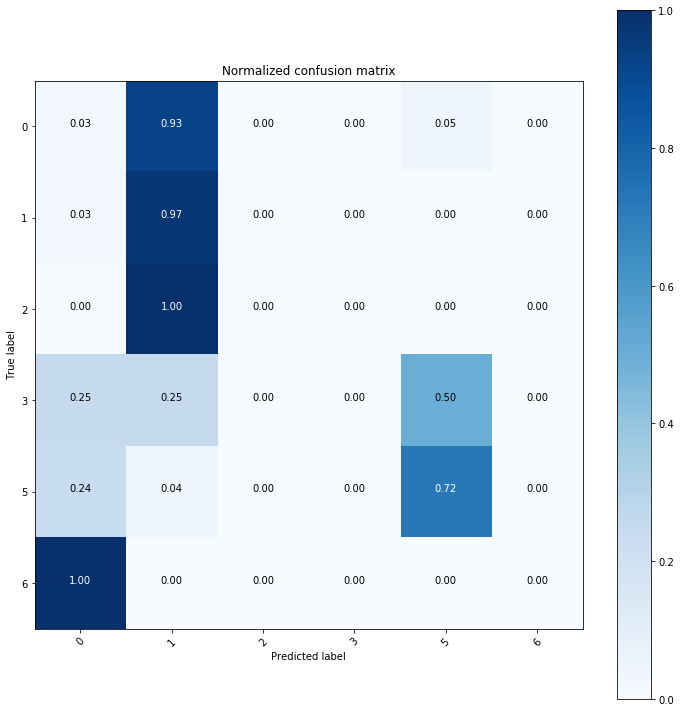

predicting 2 performance


100%|██████████| 361/361 [01:37<00:00,  3.69it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.05       0.92083333 0.         0.         0.02916667 0.        ]
 [0.01298701 0.98701299 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


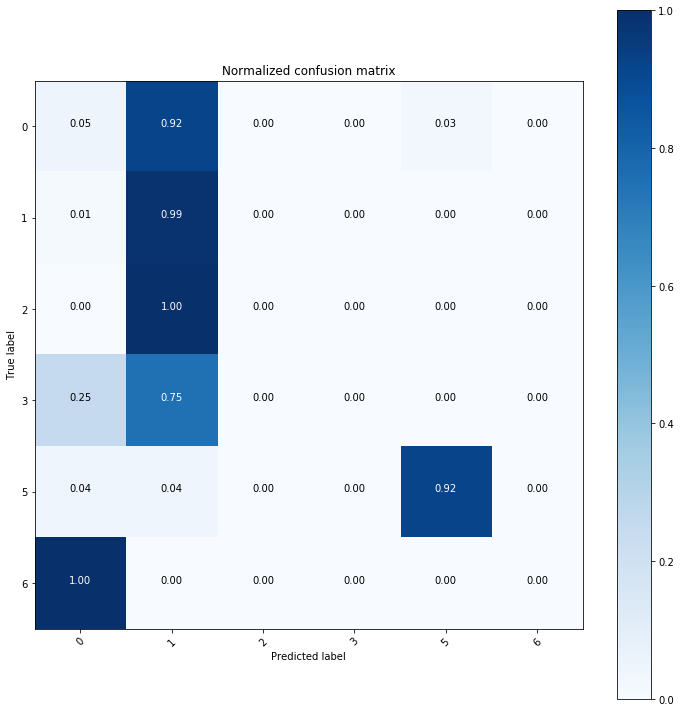

predicting 3 performance


100%|██████████| 361/361 [01:37<00:00,  3.69it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.38961039 0.61038961 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


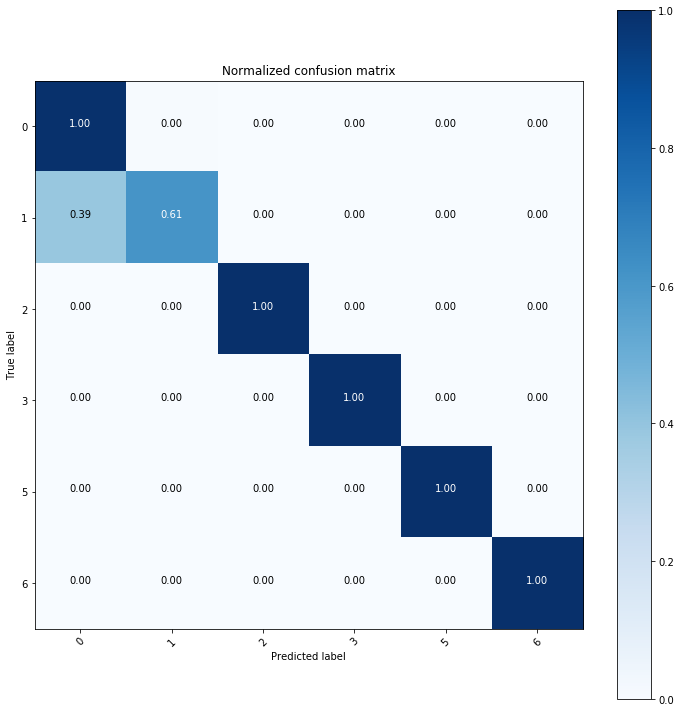

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:37<00:00,  3.69it/s]

let's go centroid=100, C=250.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:38<00:00,  3.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.02916667 0.925      0.         0.         0.04583333 0.        ]
 [0.02597403 0.97402597 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


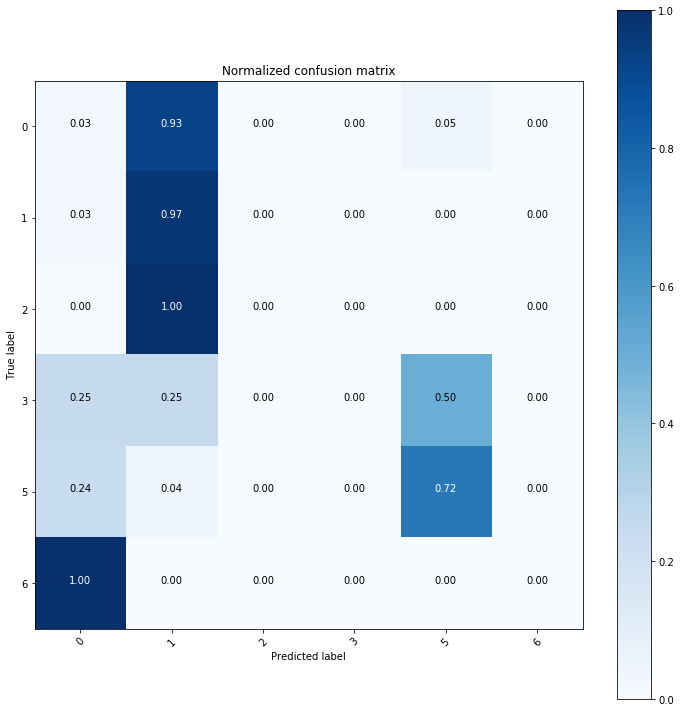

predicting 2 performance


100%|██████████| 361/361 [01:37<00:00,  3.69it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.05       0.92083333 0.         0.         0.02916667 0.        ]
 [0.01298701 0.98701299 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


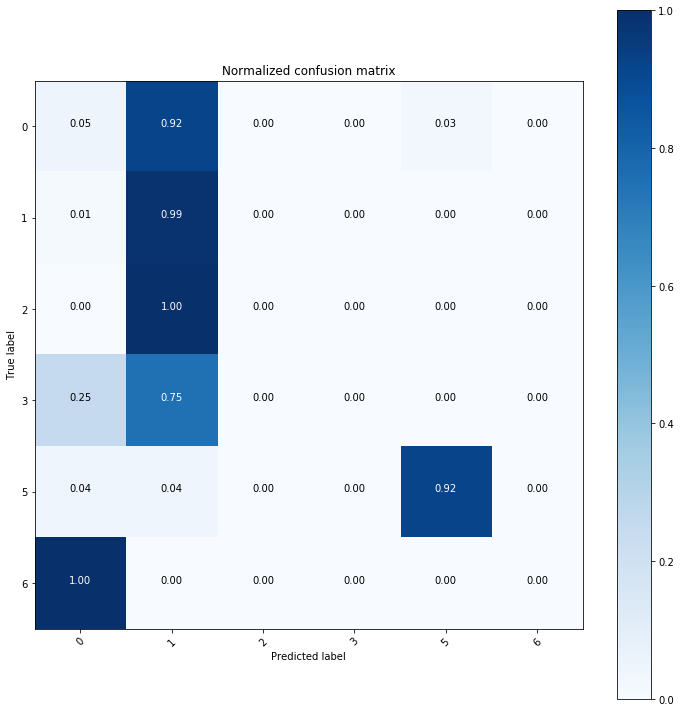

predicting 3 performance


100%|██████████| 361/361 [01:38<00:00,  3.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.20779221 0.79220779 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


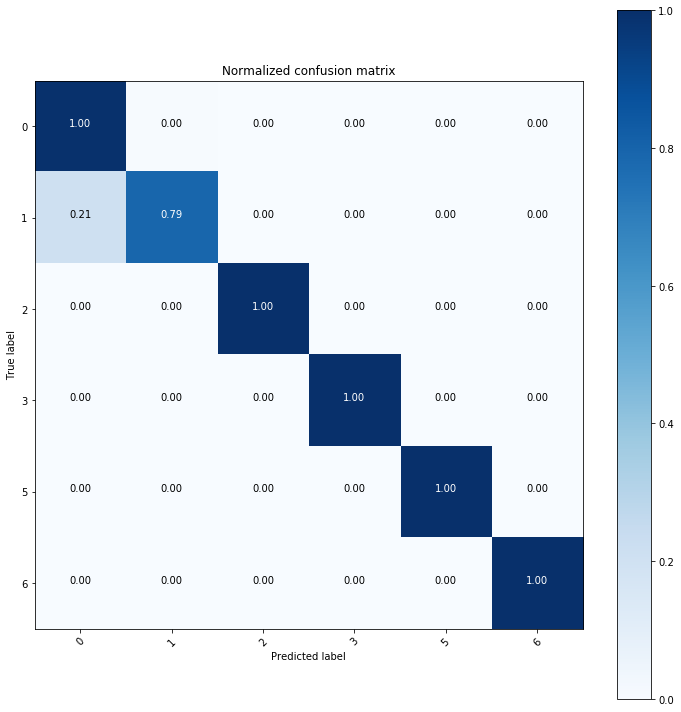

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:37<00:00,  3.71it/s]

let's go centroid=100, C=500.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:38<00:00,  3.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.02916667 0.925      0.         0.         0.04583333 0.        ]
 [0.02597403 0.97402597 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


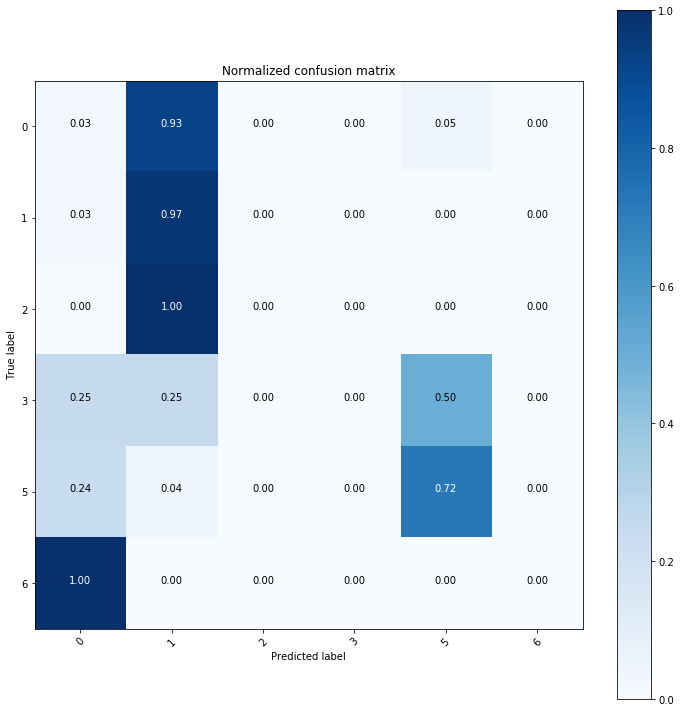

predicting 2 performance


100%|██████████| 361/361 [01:37<00:00,  3.69it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.05       0.92083333 0.         0.         0.02916667 0.        ]
 [0.01298701 0.98701299 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


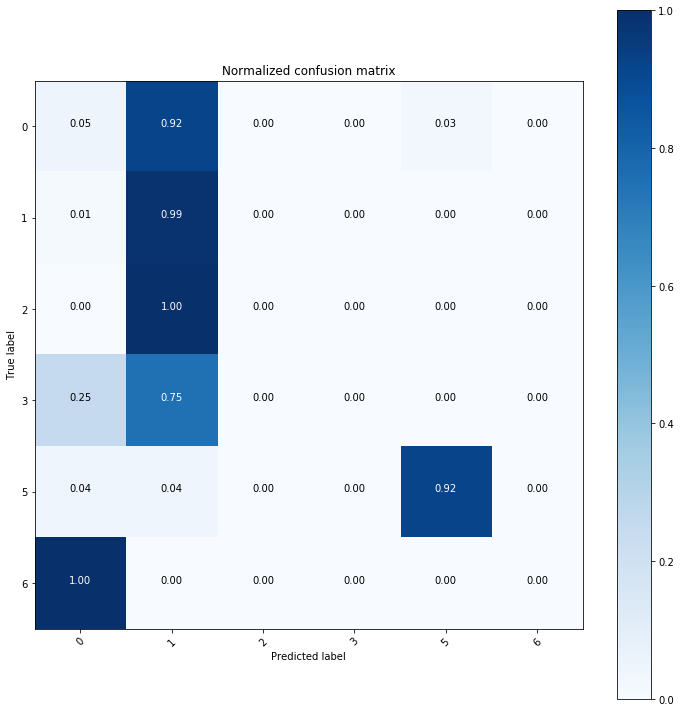

predicting 3 performance


100%|██████████| 361/361 [01:38<00:00,  3.67it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.11688312 0.88311688 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


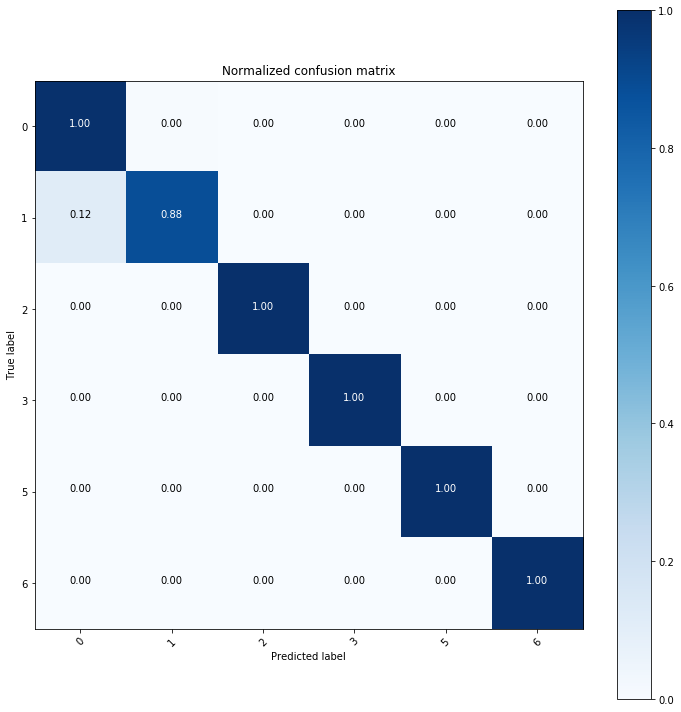

[[1.13008723e-01 0.00000000e+00 1.44563919e-01 ... 1.25747807e-02
  1.09487726e-02 2.26720896e-04]
 [1.16333911e-01 0.00000000e+00 1.54121864e-01 ... 1.63404387e-02
  8.35089064e-03 3.05049574e-04]
 [1.12861637e-01 5.07567983e-05 1.47849462e-01 ... 4.25693597e-02
  4.92267579e-03 1.99954177e-03]
 ...
 [1.08334016e-01 2.54585129e-04 1.19175627e-01 ... 7.07004705e-02
  3.89576788e-02 5.23012765e-03]
 [1.14581969e-01 1.15464006e-05 1.25448029e-01 ... 7.03858589e-02
  4.12527253e-02 5.35382921e-03]
 [1.16506020e-01 0.00000000e+00 1.32915173e-01 ... 7.30261757e-02
  3.33790037e-02 5.04129732e-03]]


100%|██████████| 361/361 [01:37<00:00,  3.69it/s]

let's go centroid=100, C=750.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:37<00:00,  3.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.24583333 0.70833333 0.         0.         0.04583333 0.        ]
 [0.20779221 0.79220779 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.25       0.25       0.         0.         0.5        0.        ]
 [0.24       0.04       0.         0.         0.72       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


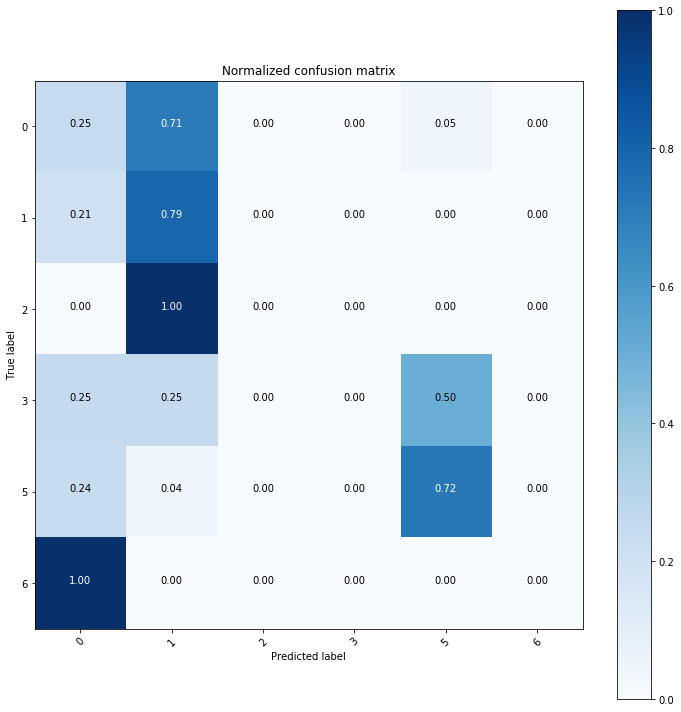

predicting 2 performance


100%|██████████| 361/361 [01:37<00:00,  3.71it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.1875     0.78333333 0.         0.         0.02916667 0.        ]
 [0.15584416 0.84415584 0.         0.         0.         0.        ]
 [0.16666667 0.83333333 0.         0.         0.         0.        ]
 [0.25       0.75       0.         0.         0.         0.        ]
 [0.04       0.04       0.         0.         0.92       0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


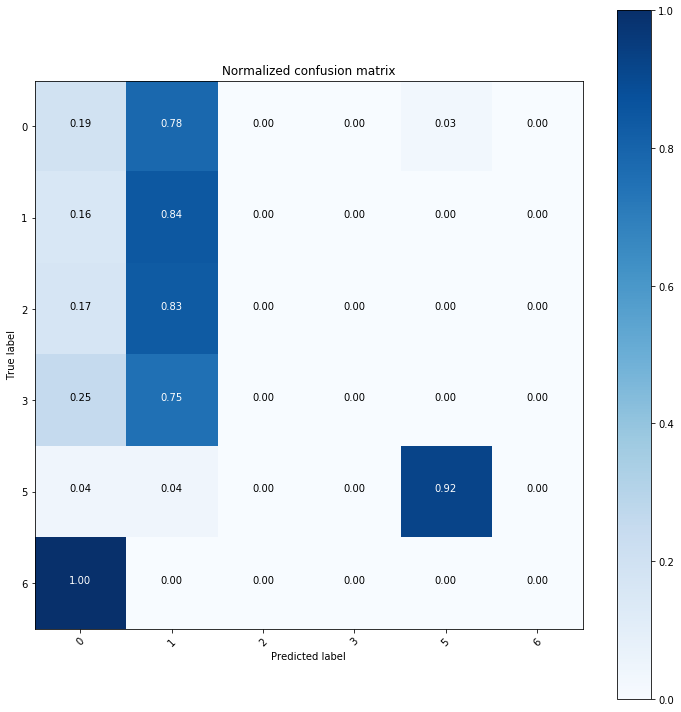

predicting 3 performance


100%|██████████| 361/361 [01:37<00:00,  3.69it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.07792208 0.92207792 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


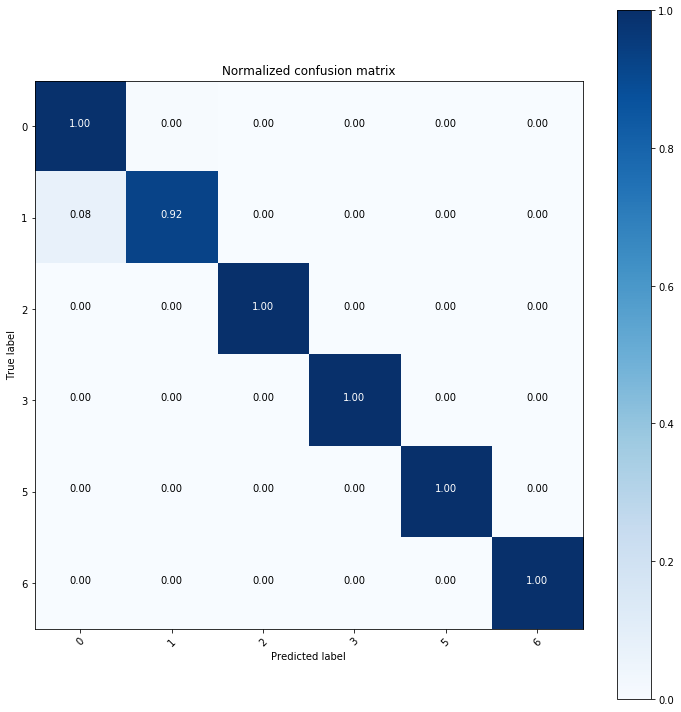

In [9]:
for k in [10, 30, 50, 100]:
    for C in [100, 250, 500, 750]: 
        model = Model(k_centroid=k, tolerance=C)
        model.fit(pfs[TRAIN_ORDER - 1])
        print('let\'s go centroid=%d, C=%.2f @@@@@@@@@@@@@@@' % (k, C))
        for od in range(len(pfs)):
            print('predicting %d performance' % (od + 1))
            pred_y, y = model.predict(pfs[od])
            
            print('============ prediction arm ============')
            cutstom_output_cnf_matrix(y, pred_y)